**Customer Shopping Intention Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

In [ ]:
#from google.colab import files
#uploaded=files.upload()

In [ ]:
data=pd.read_csv('online_shoppers_intention.csv')

In [ ]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [ ]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
for col in data.columns:
    if data[col].dtypes == "int64" or "float64":
      print('{} : {}'.format(col,np.sort(data[col].unique())))
    else:
      print('{} : {}'.format(col,data[col].unique()))
    print('no. of unique attributes - {}'.format(len(data[col].unique())))
    print('----------------------------------------------------------------------')


Administrative : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27]
no. of unique attributes - 27
----------------------------------------------------------------------
Administrative_Duration : [0.00000000e+00 1.33333333e+00 2.00000000e+00 ... 2.65731806e+03
 2.72050000e+03 3.39875000e+03]
no. of unique attributes - 3335
----------------------------------------------------------------------
Informational : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 24]
no. of unique attributes - 17
----------------------------------------------------------------------
Informational_Duration : [0.00000000e+00 1.00000000e+00 1.50000000e+00 ... 2.25203333e+03
 2.25691667e+03 2.54937500e+03]
no. of unique attributes - 1258
----------------------------------------------------------------------
ProductRelated : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  

In [ ]:
for d in data.columns:
  print(data[d].value_counts())
  print('----------------------------------------------------------------------')


0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64
----------------------------------------------------------------------
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64
----------------------------------------------------------------------
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64
--------------------------------------

In [ ]:
for d in data.columns:
  print('No of distinct values for the feature',d,'are',len(data[d].unique()))

No of distinct values for the feature Administrative are 27
No of distinct values for the feature Administrative_Duration are 3335
No of distinct values for the feature Informational are 17
No of distinct values for the feature Informational_Duration are 1258
No of distinct values for the feature ProductRelated are 311
No of distinct values for the feature ProductRelated_Duration are 9551
No of distinct values for the feature BounceRates are 1872
No of distinct values for the feature ExitRates are 4777
No of distinct values for the feature PageValues are 2704
No of distinct values for the feature SpecialDay are 6
No of distinct values for the feature Month are 10
No of distinct values for the feature OperatingSystems are 8
No of distinct values for the feature Browser are 13
No of distinct values for the feature Region are 9
No of distinct values for the feature TrafficType are 20
No of distinct values for the feature VisitorType are 3
No of distinct values for the feature Weekend are 

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revenue', ylabel='count'>

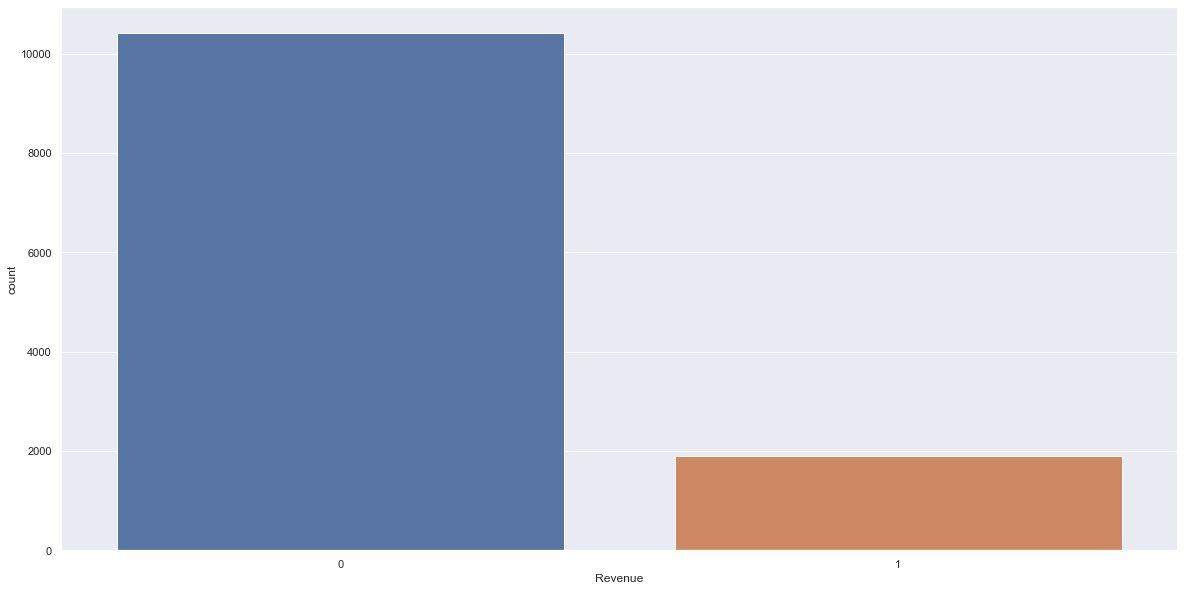

In [ ]:
sns.countplot(data['Revenue'])

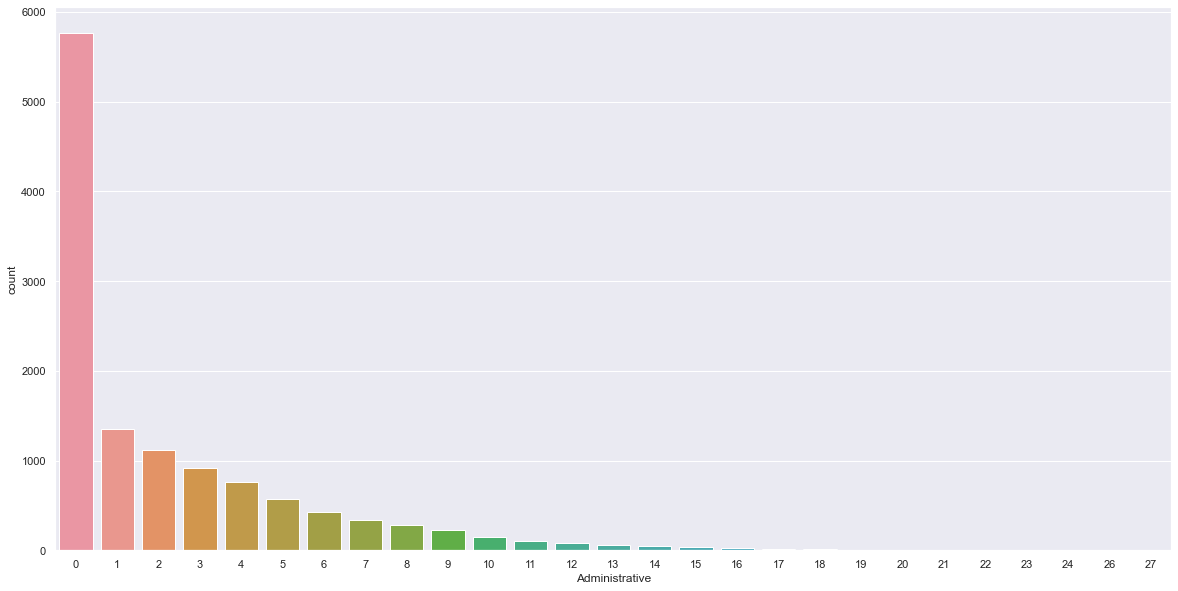

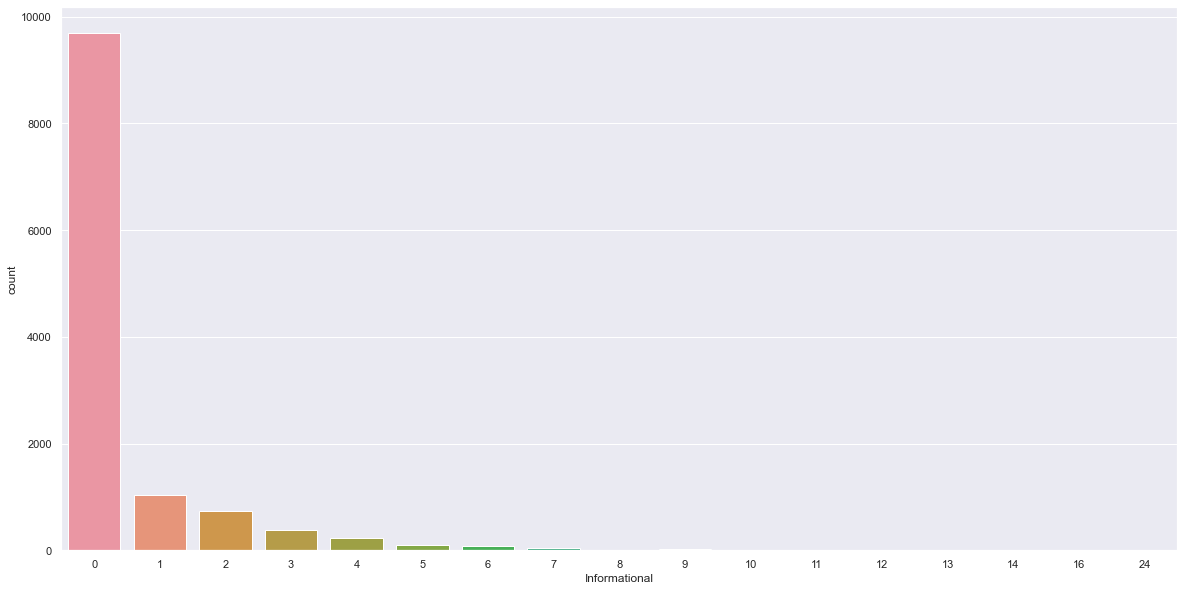

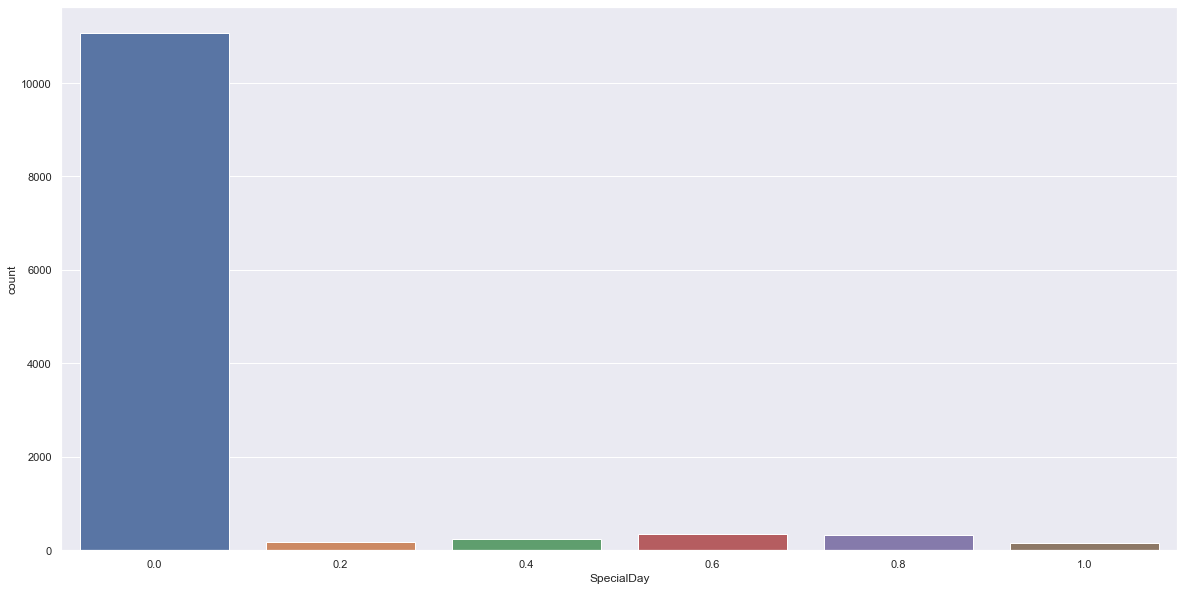

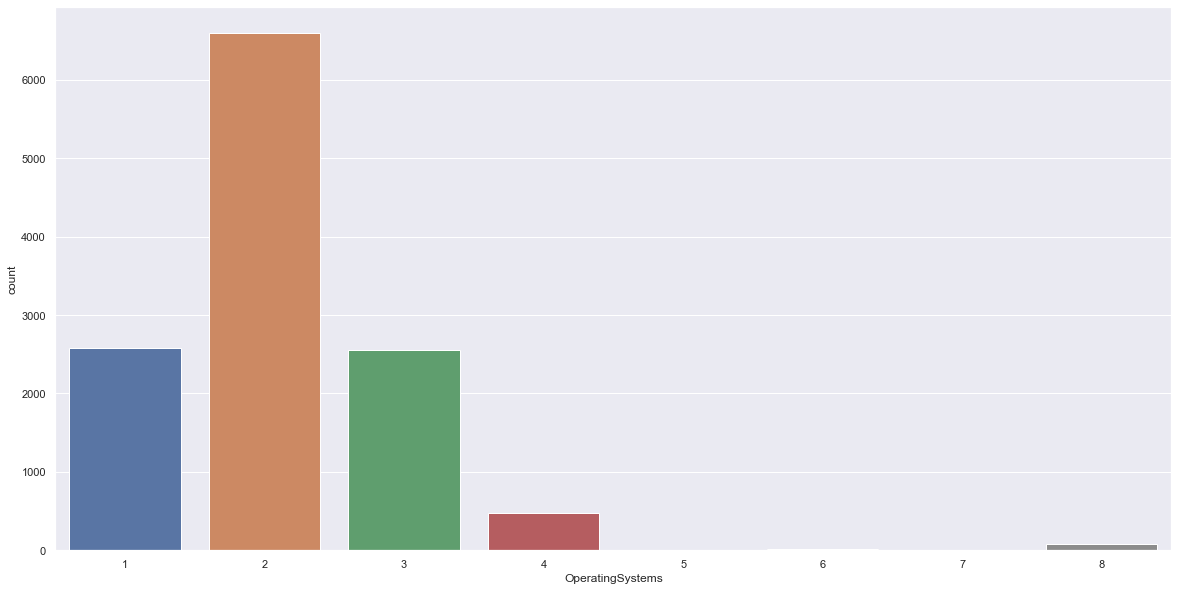

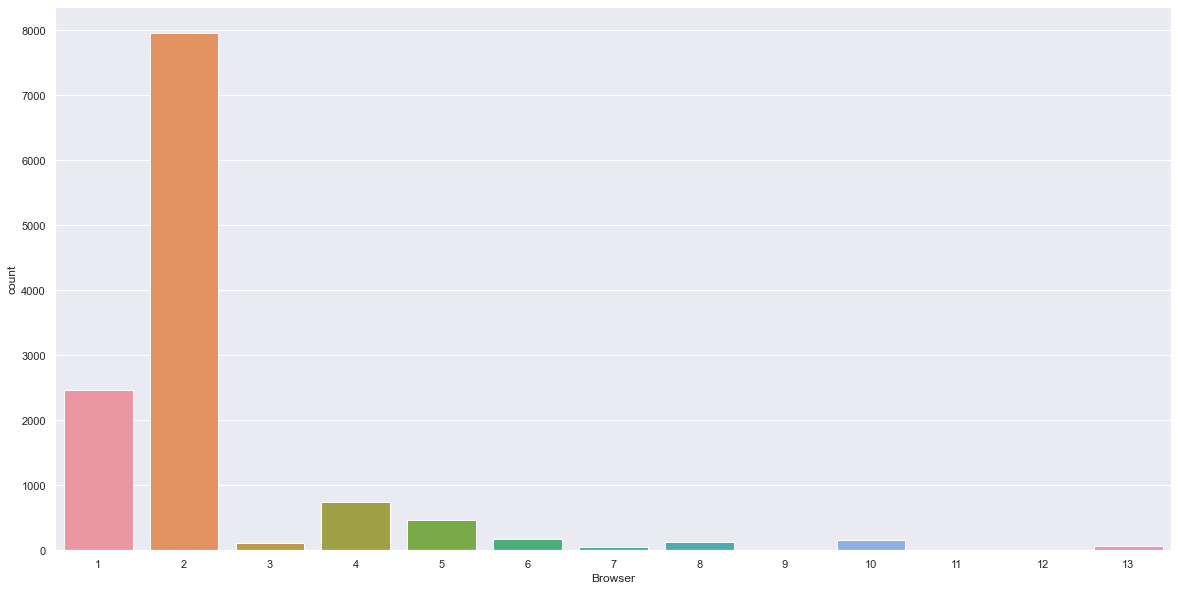

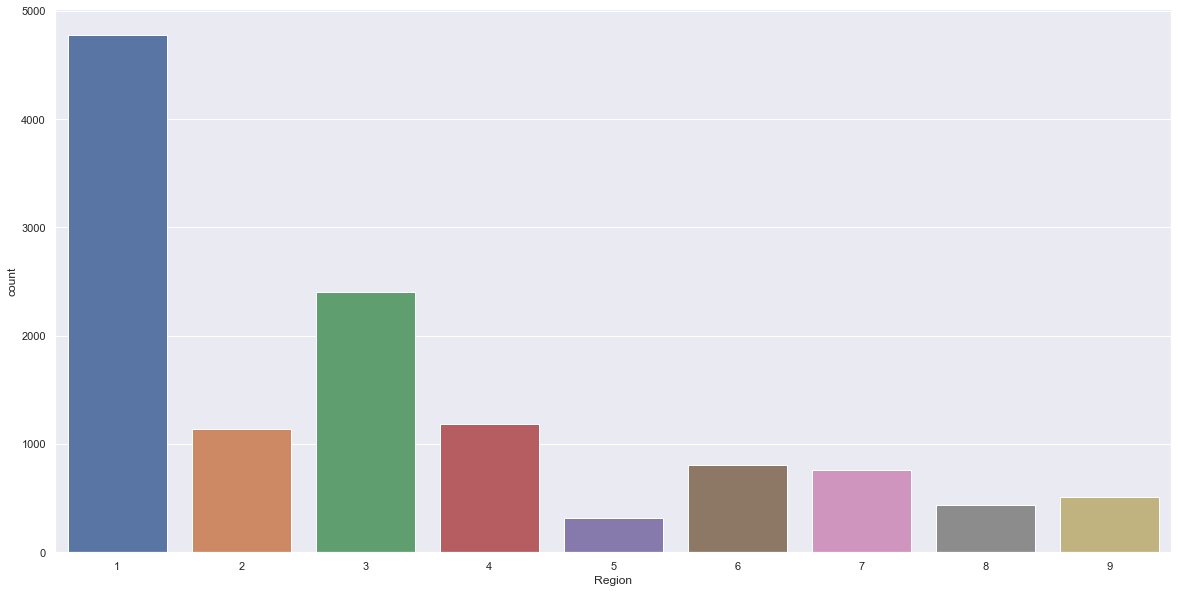

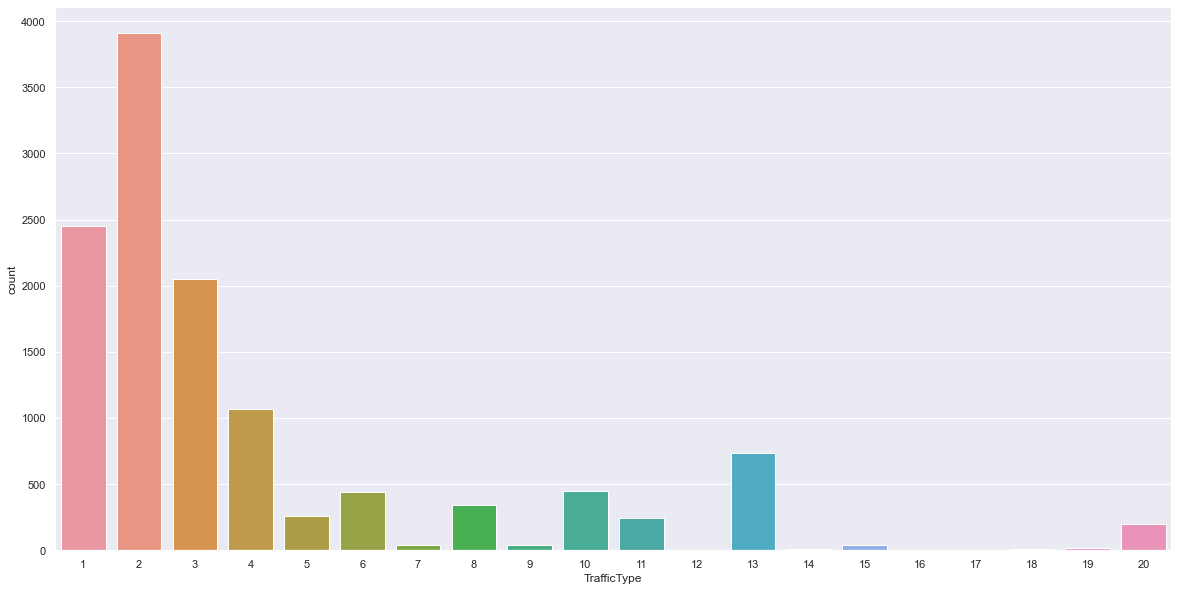

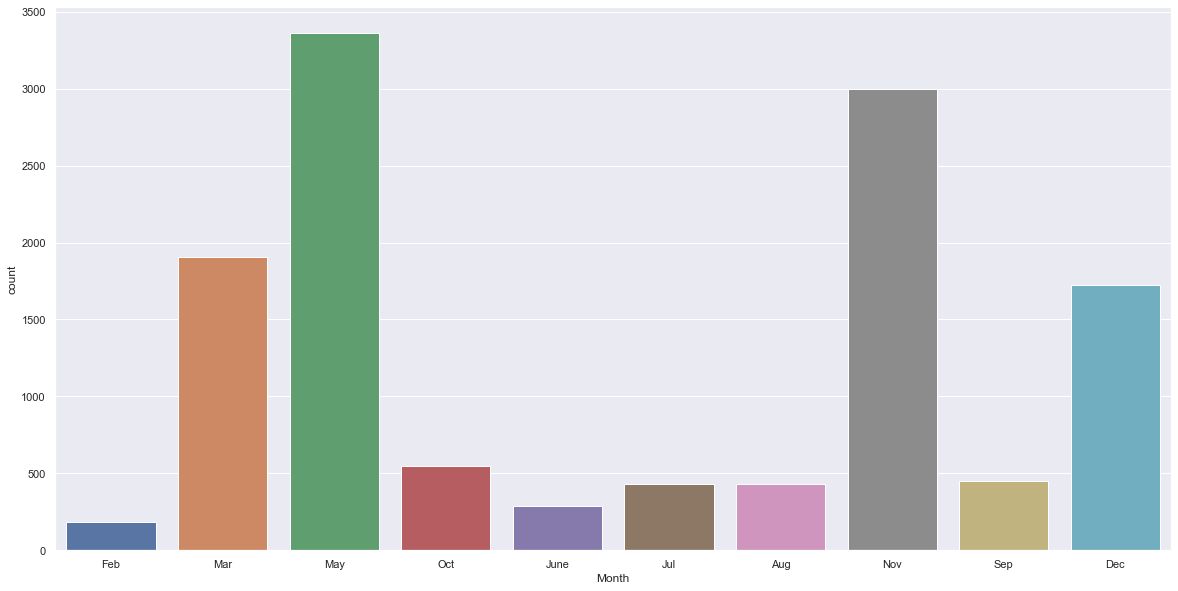

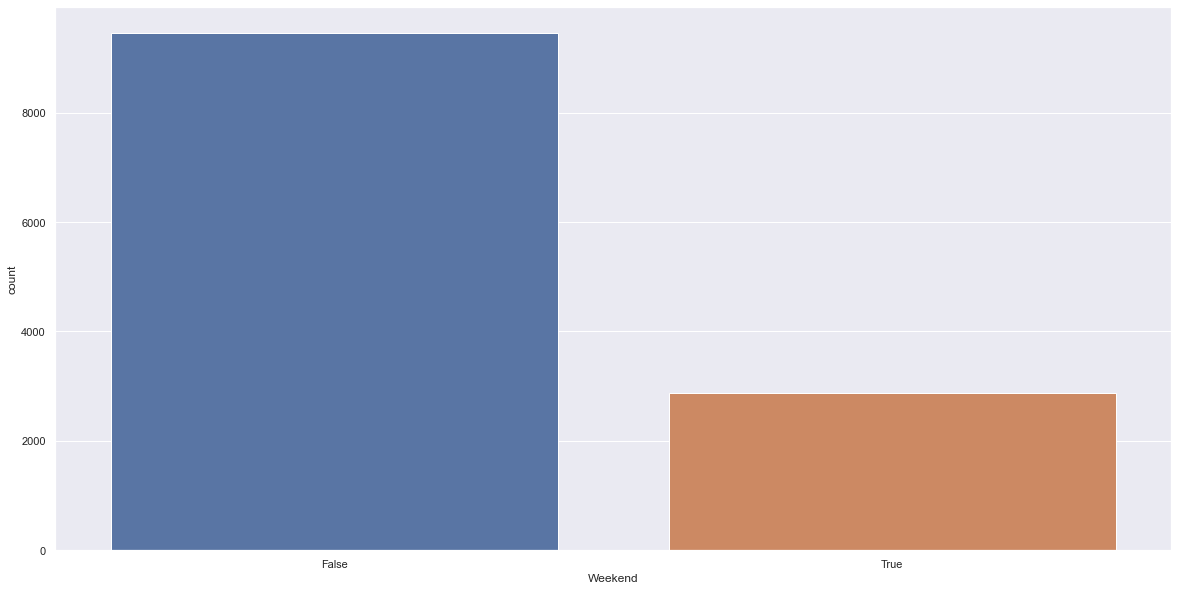

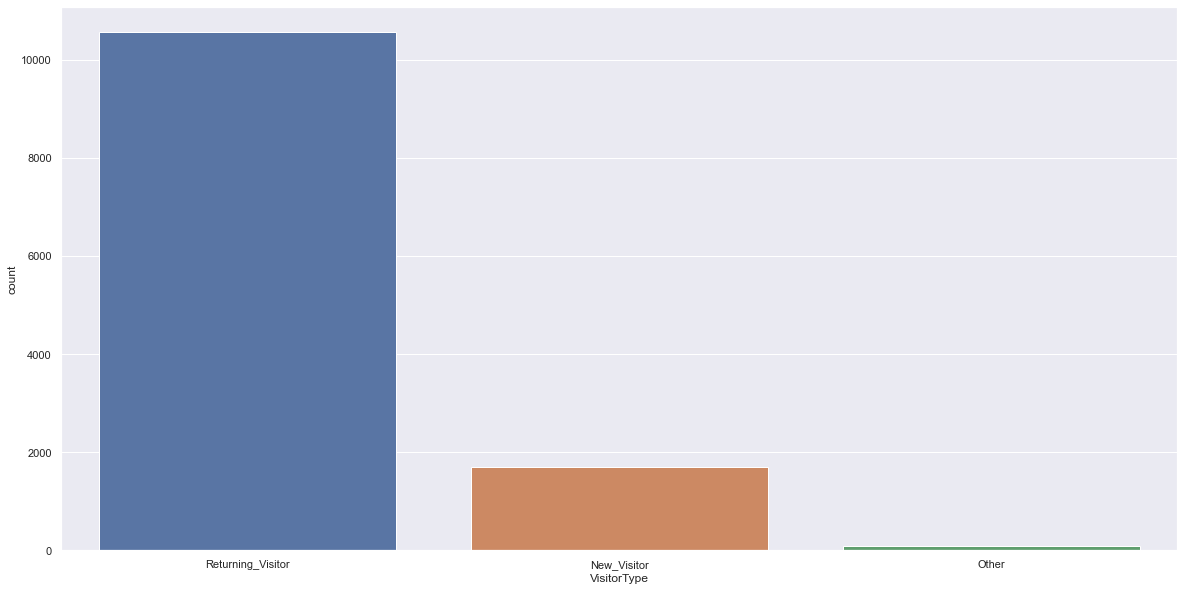

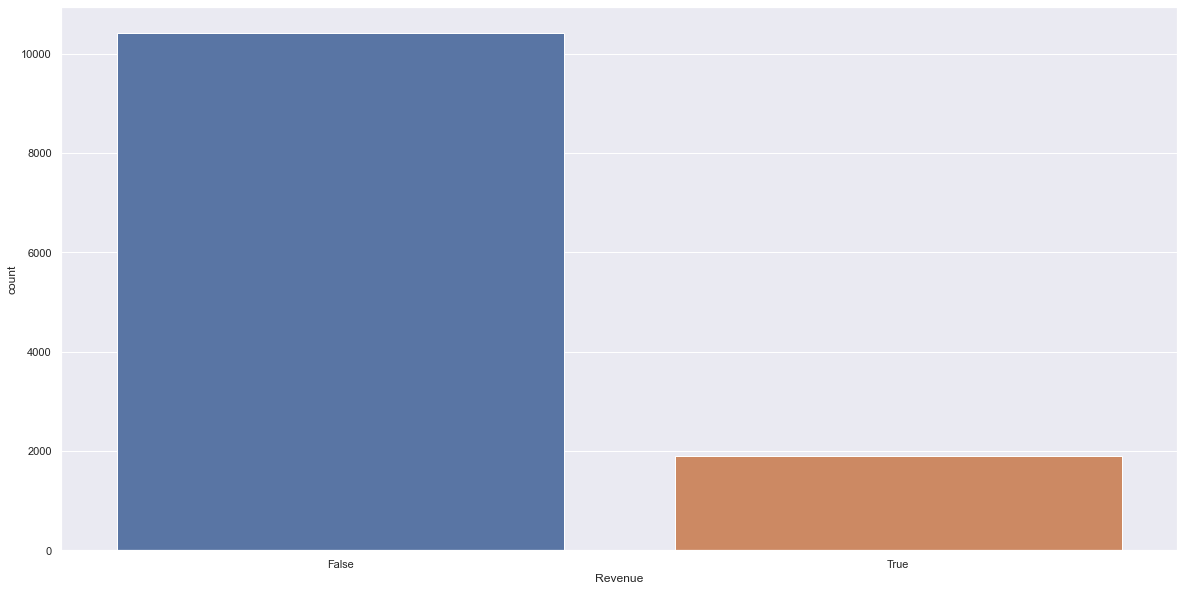

In [ ]:
col_names = ['Administrative', 'Informational', 'SpecialDay','OperatingSystems', 'Browser', 'Region',
             'TrafficType','Month', 'Weekend', 'VisitorType', 'Revenue']
for i, col in enumerate(data[col_names].columns):
    plt.figure(i)
    sns.countplot(x=col, data=data[col_names])

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


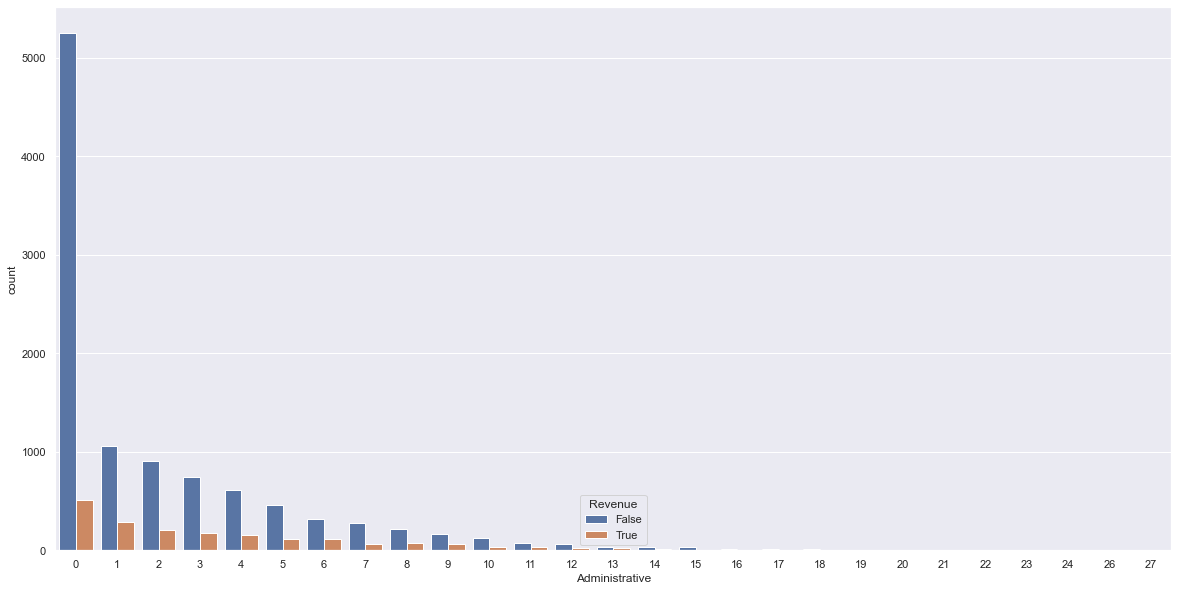

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


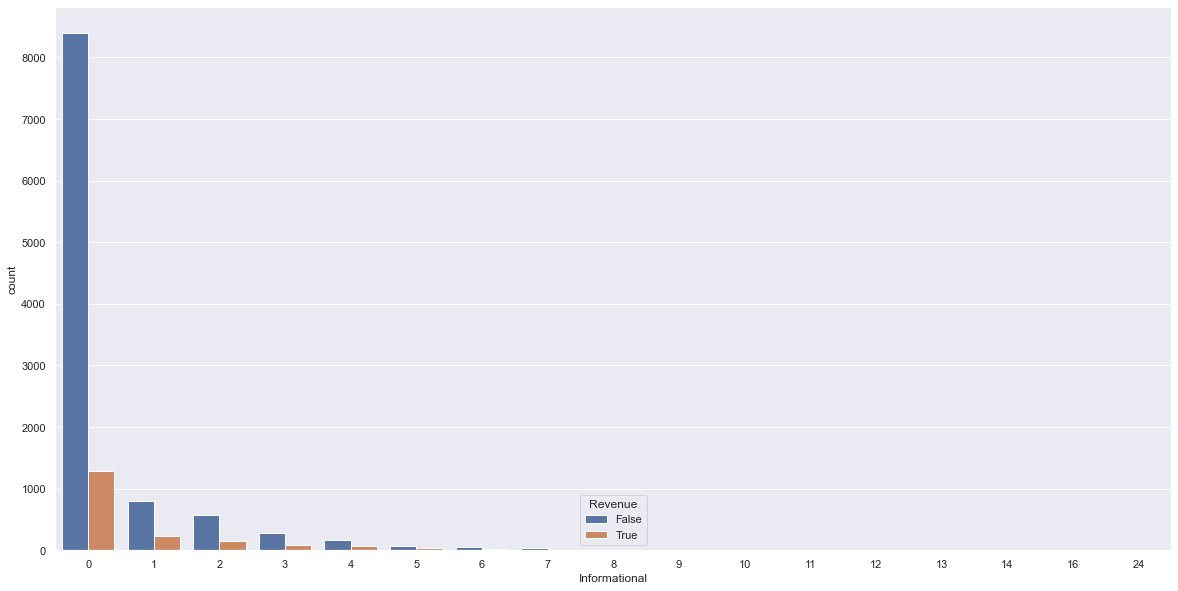

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


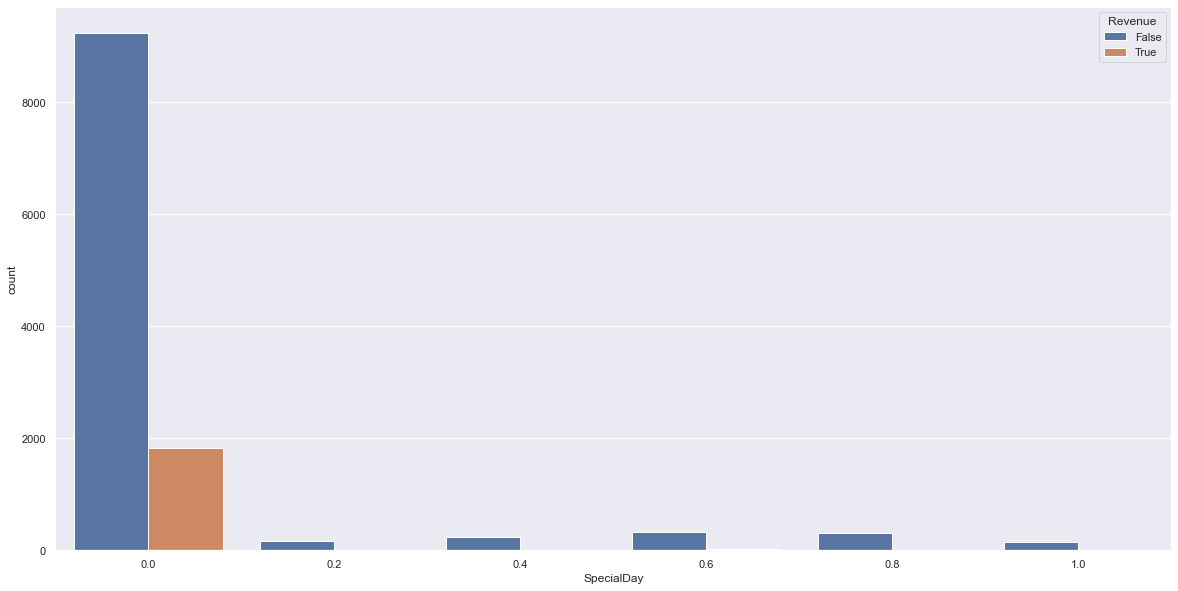

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


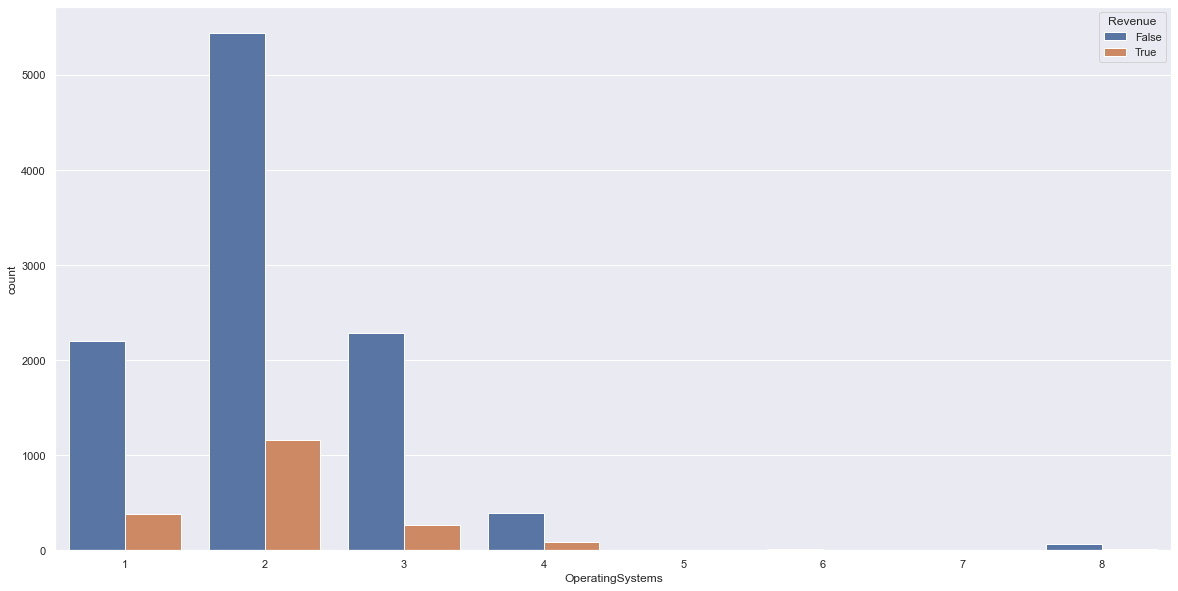

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


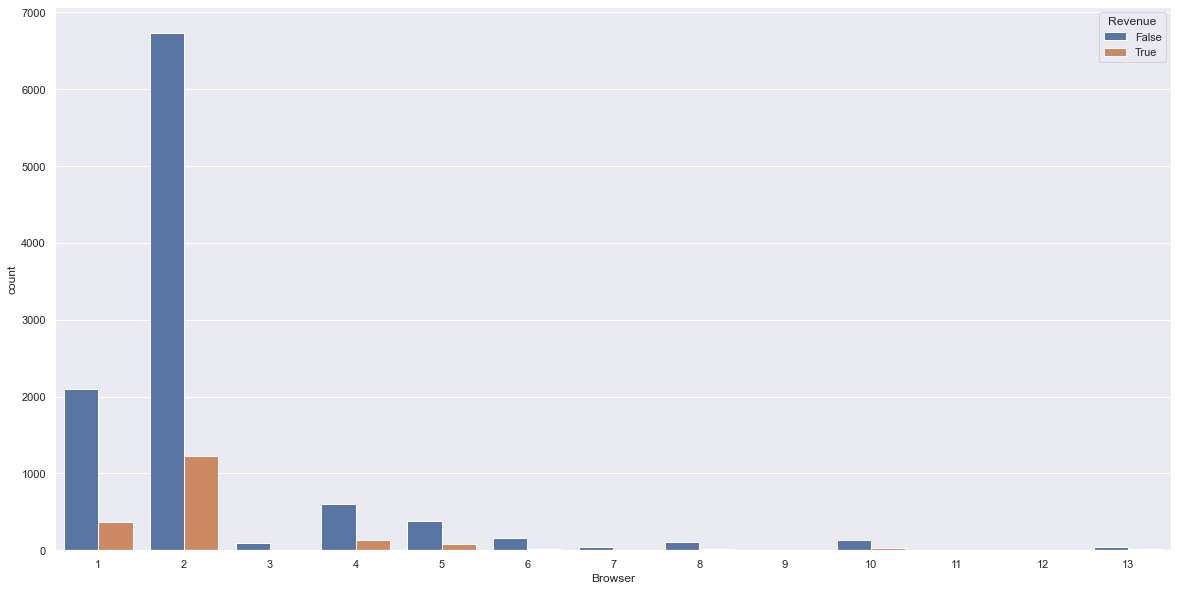

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


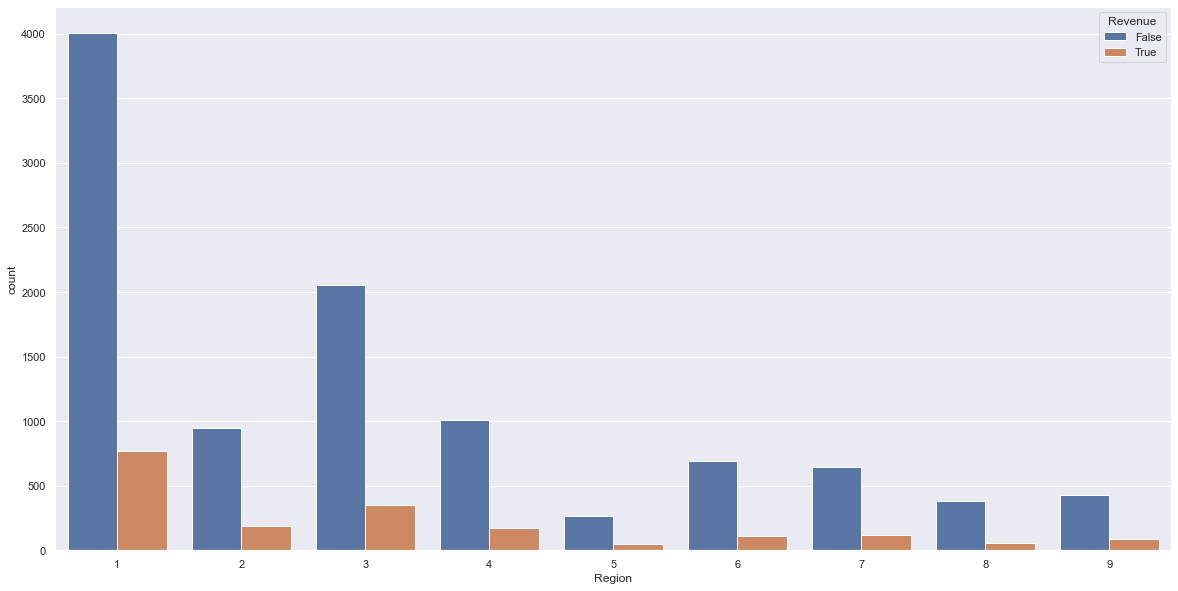

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


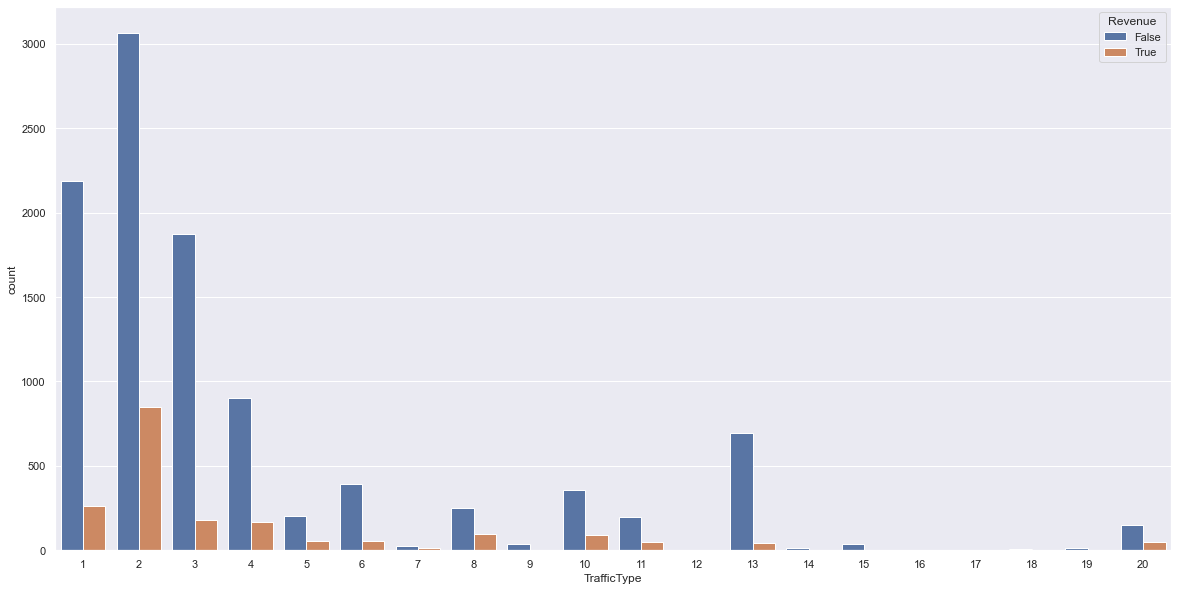

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


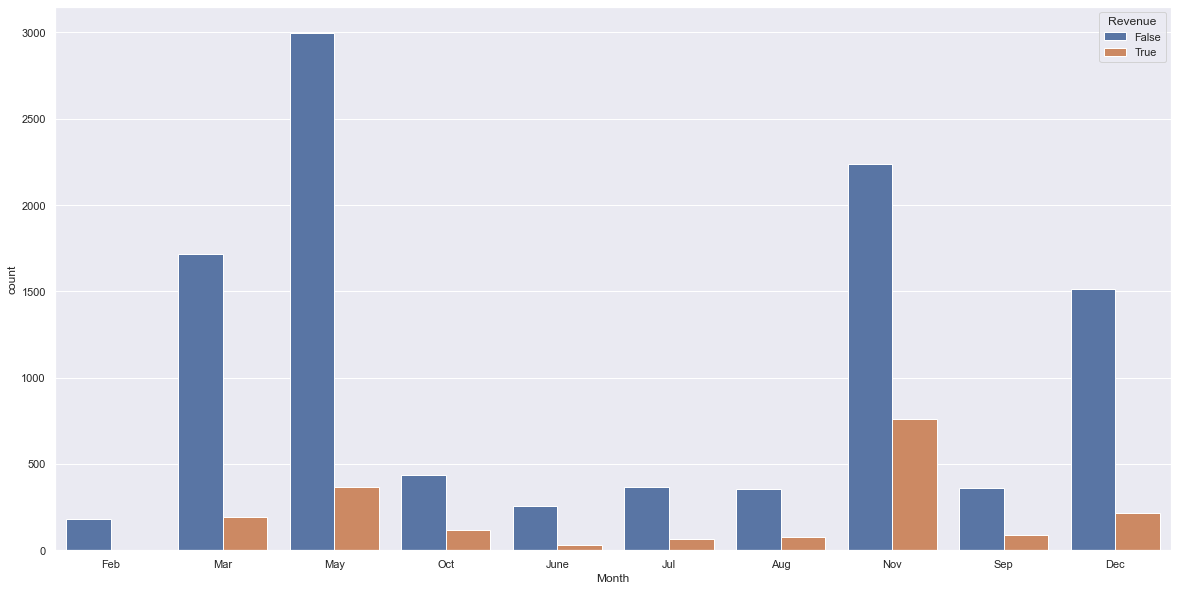

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


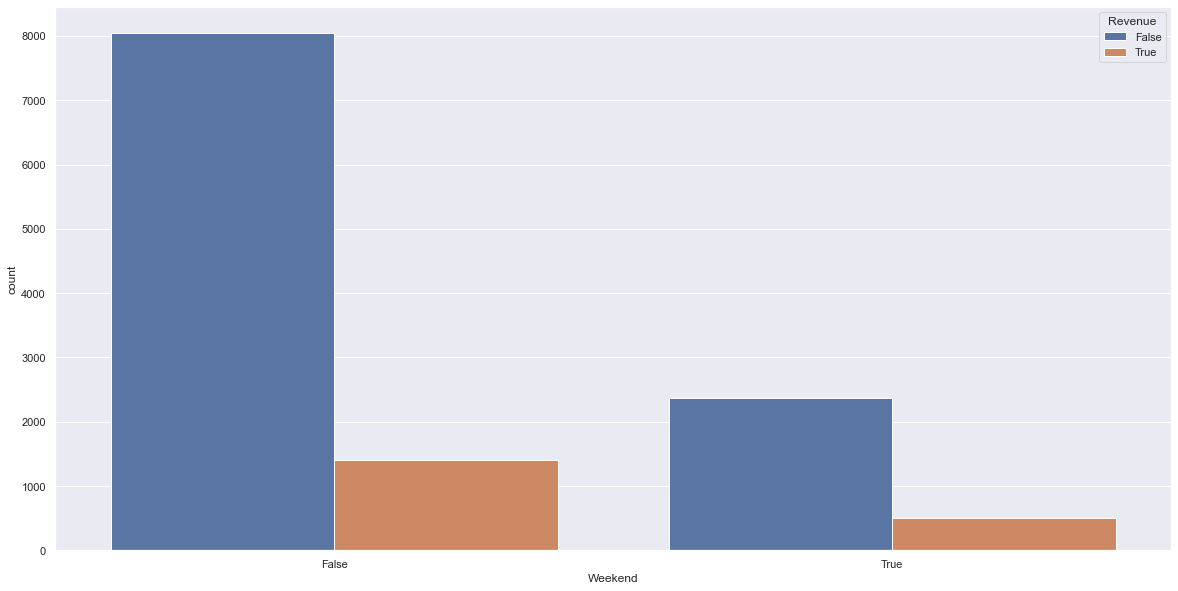

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


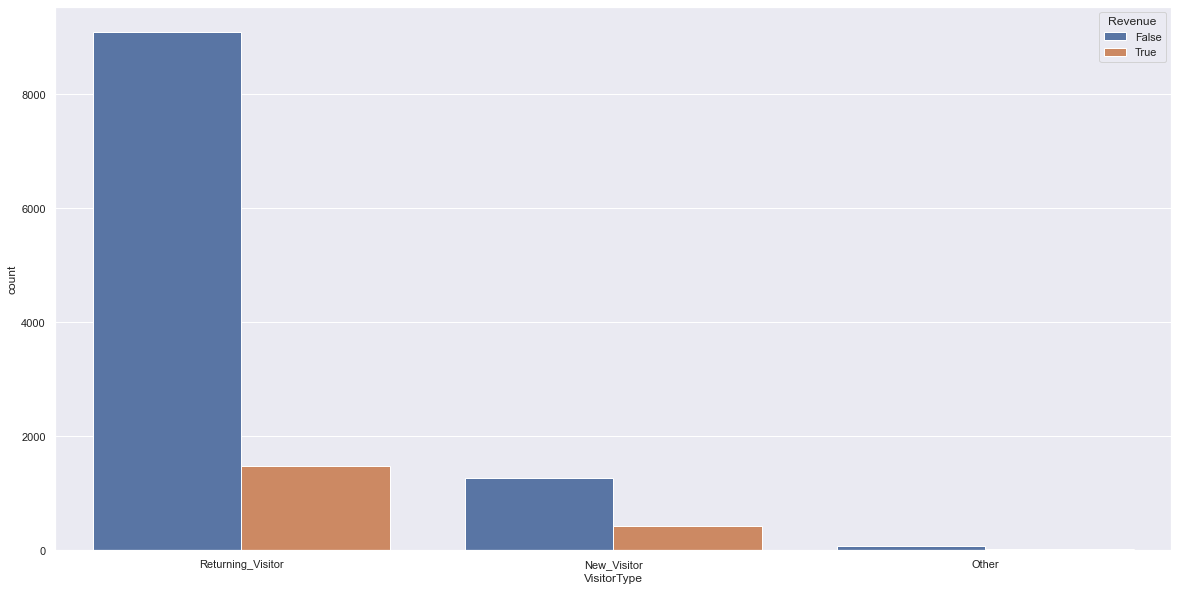

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


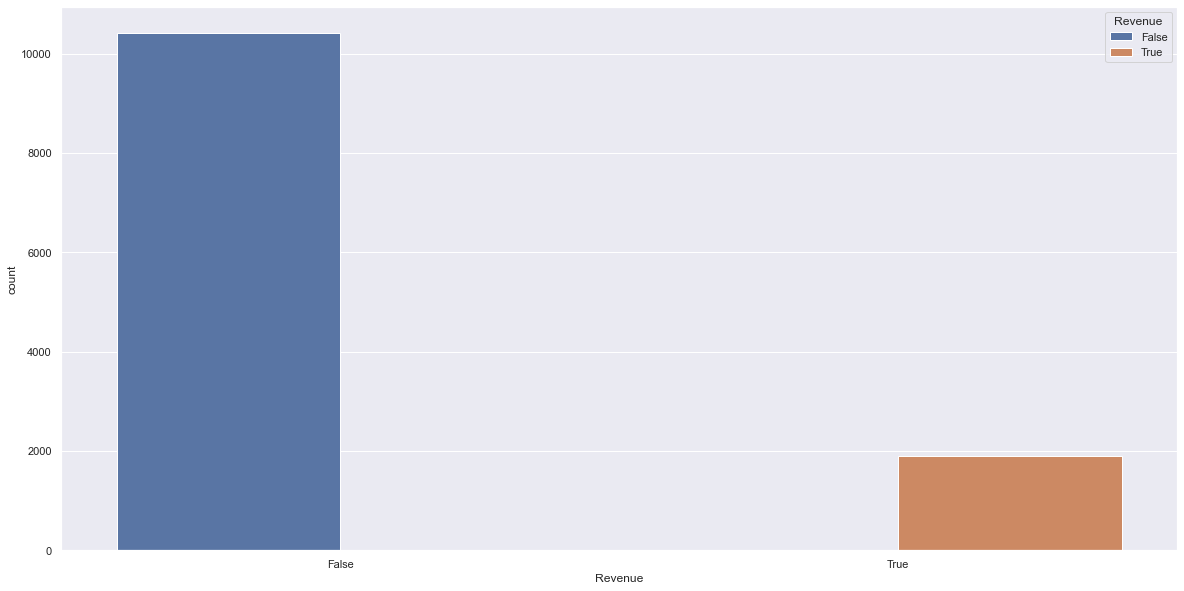

In [ ]:
for d in data[col_names].columns:
  plt.figure()
  sns.countplot(data[d],hue=data['Revenue'])
  plt.show()

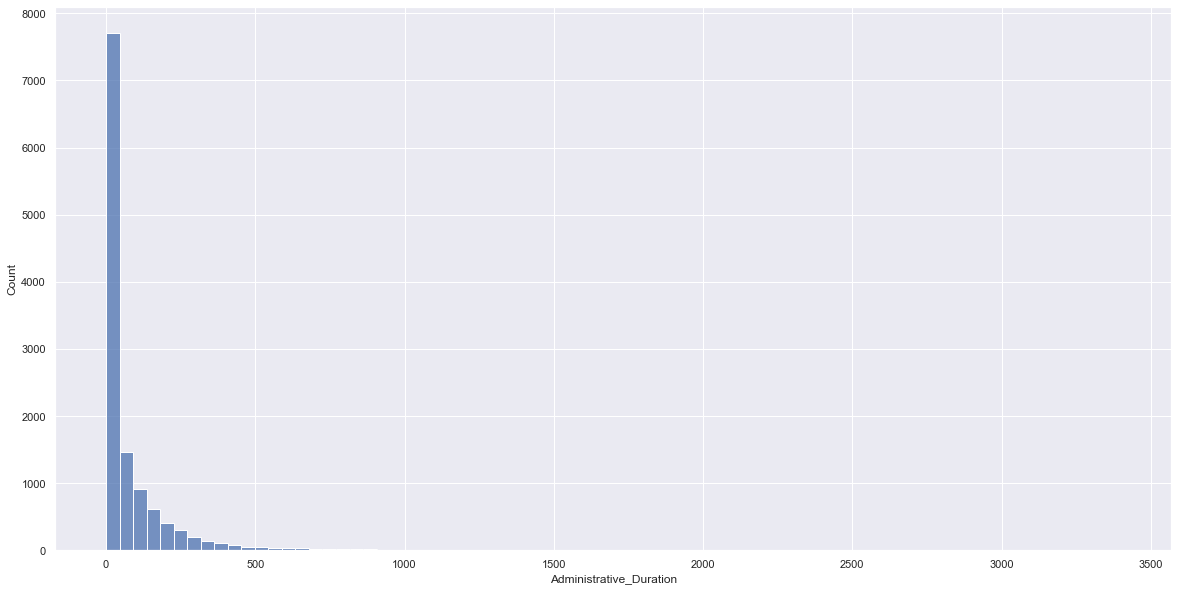

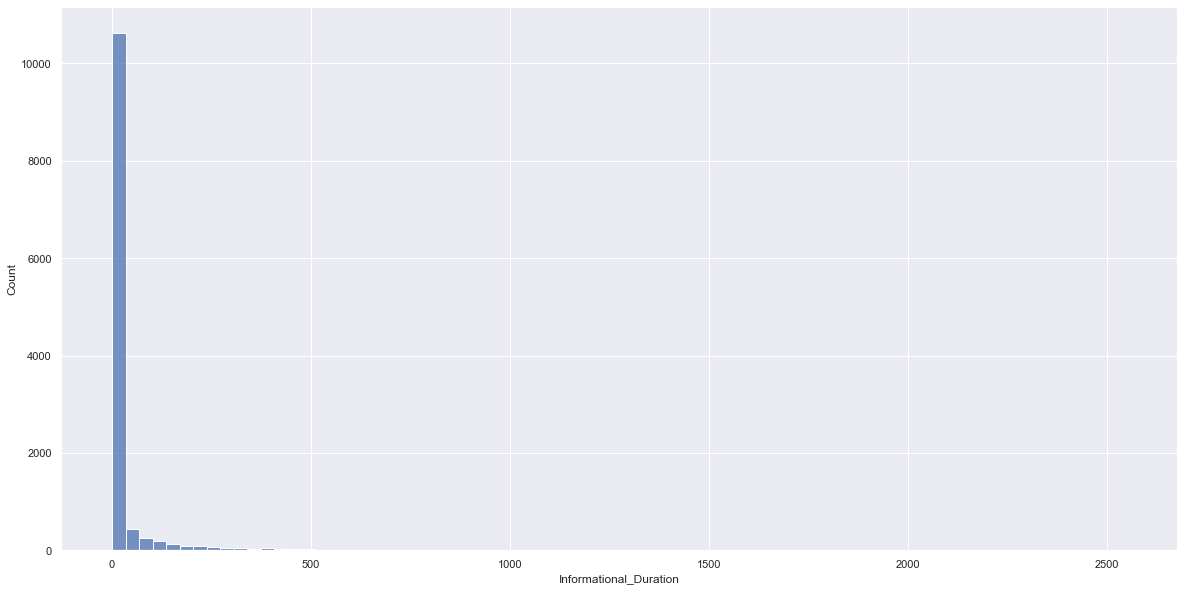

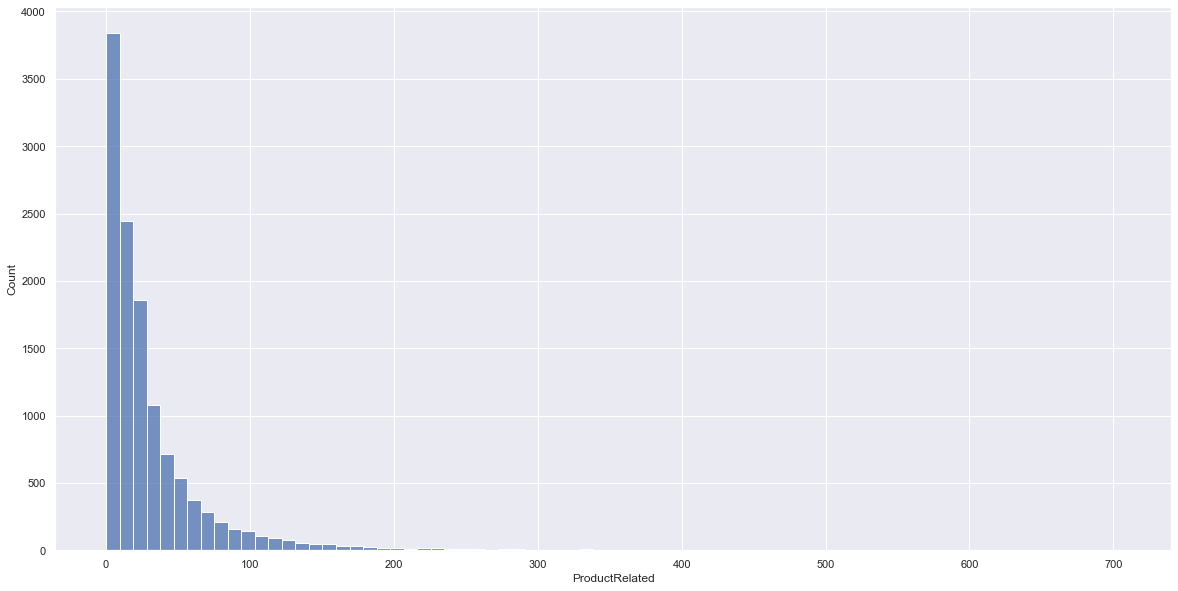

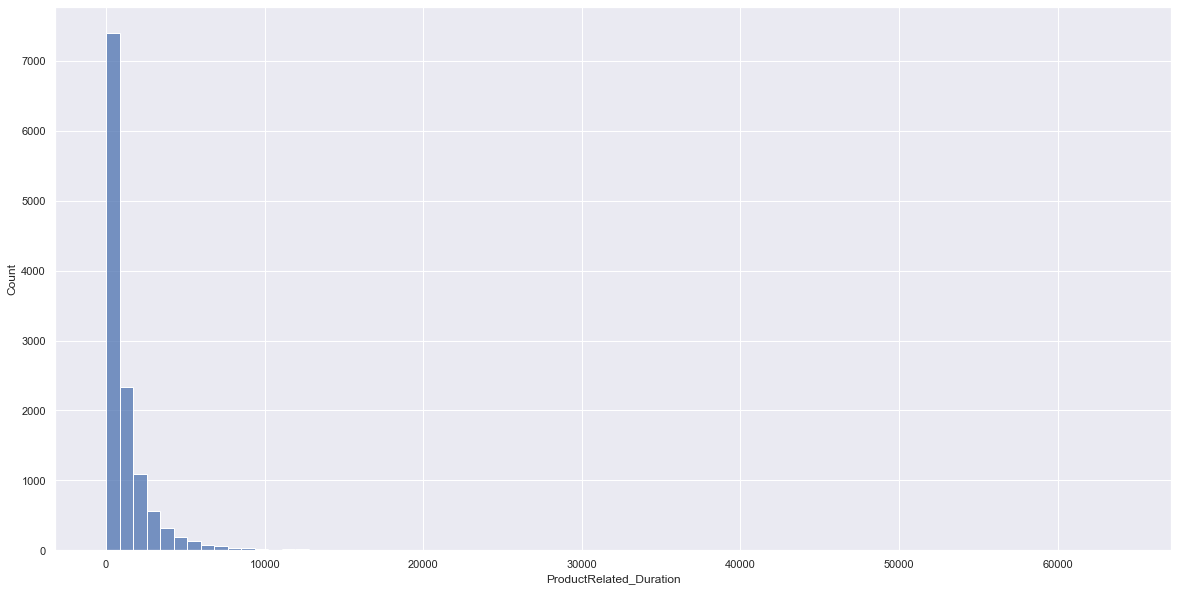

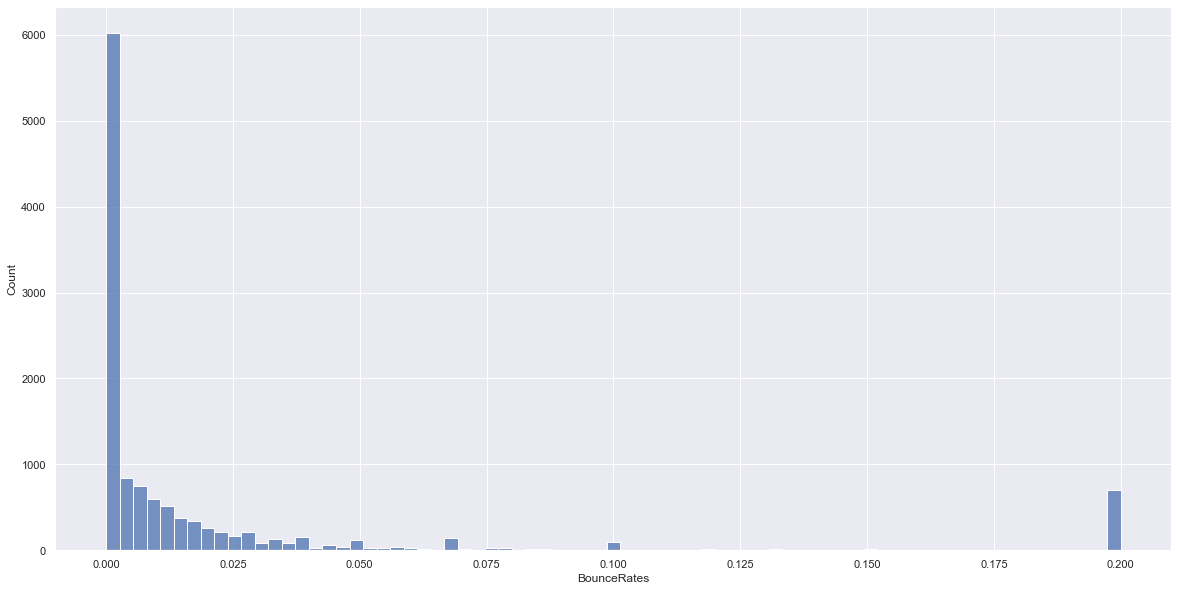

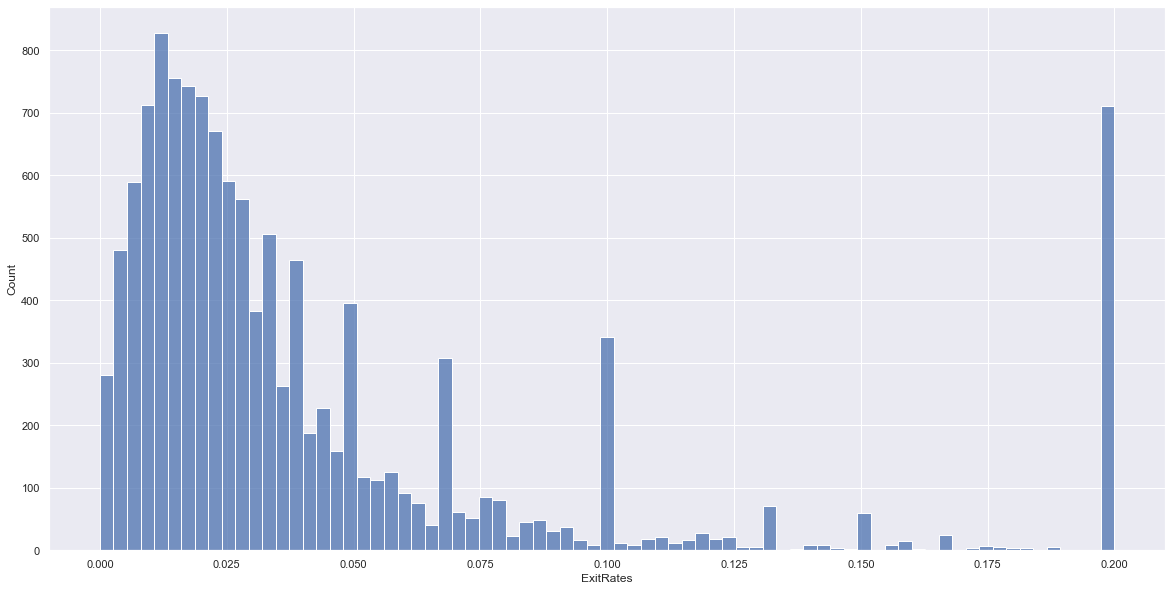

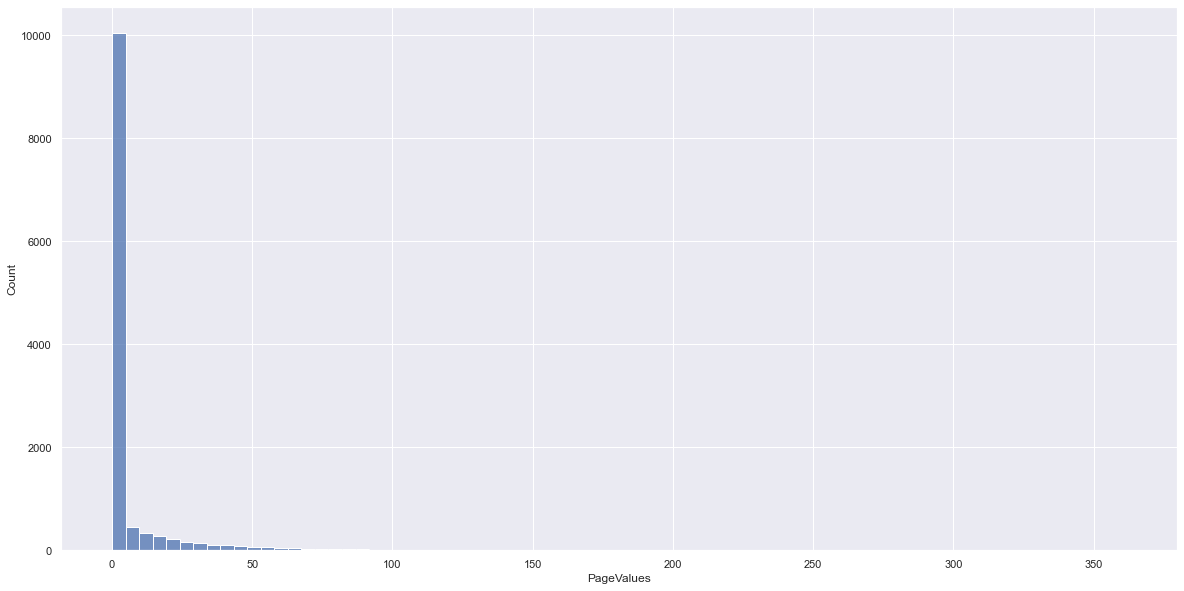

In [ ]:
k=data.drop(col_names,axis=1)
for d in k.columns:
  plt.figure()
  sns.histplot(k[d],bins=75)
  plt.show()

In [ ]:
#data.corr()

<AxesSubplot:>

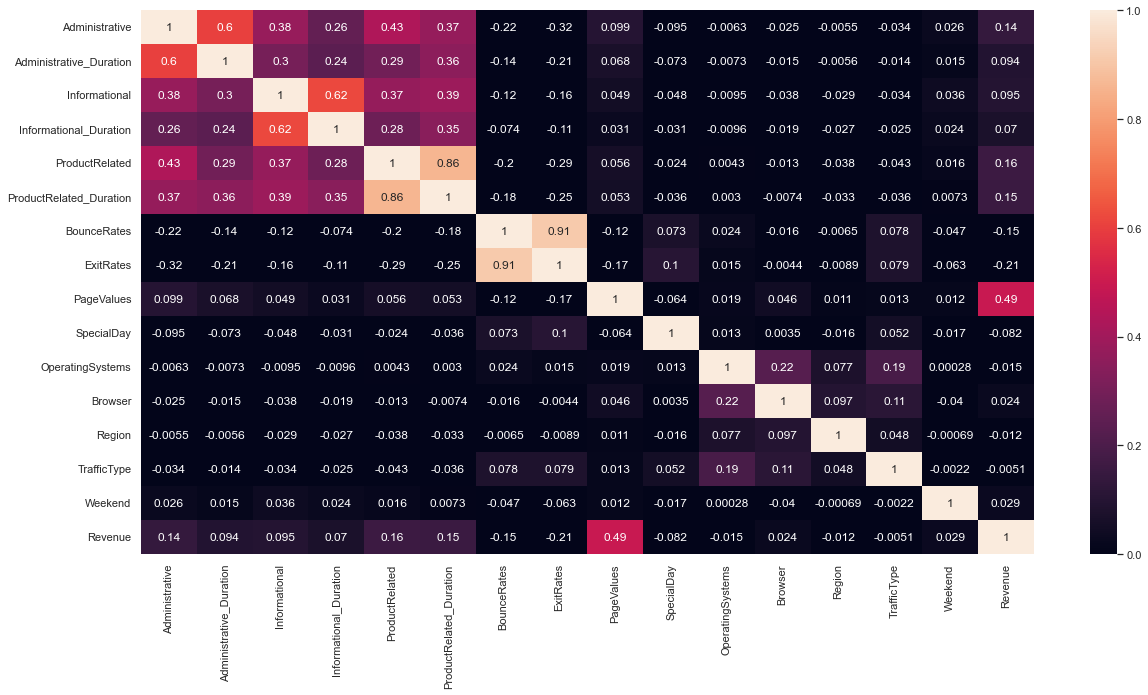

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(data.corr(), annot=True, vmin = 0)

 From the above heatmap, we observe the following that there is a limited number of features that correlate to eachother. The very few pair of features that have a high correlation ie correlation >= 0.75 are :

1.   BounceRates & ExitRates (0.91).
2.   ProductRelated & ProductRelated_Duration (0.86).

features that have a mild correlation (0.35 <= correlation < 0.75) are :


1. Administrative and Administrative_Duration (0.6)
2. Administrative and Informational (0.38)
3. Administrative and ProductRelated (0.43)
4. Administrative and ProductRelated_Duration (0.37)
5. Administrative_Duration and ProductRelated_Duration (0.36)
6. Informational and Informational_Duration (0.62)
7. Informational and ProductRelated (0.37)
7. Informational and ProductRelated_Duration (0.39)
8. Informational_Duration and ProductRelated_Duration (0.35)
9. PageValues and Revenue (0.49)


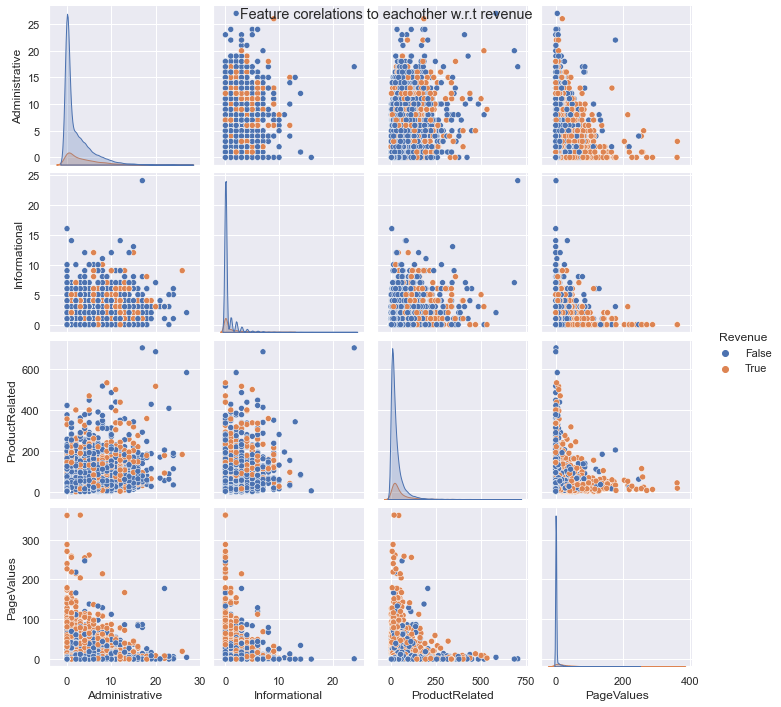

In [ ]:
corr = sns.pairplot(data[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']], hue='Revenue')
corr.fig.suptitle('Feature corelations to eachother w.r.t revenue')
plt.show()

From the above plots we can see that a linear decision boundary will not be possible to segregate the data based on revenue using any two pair of the highly and moderately correlated pairs we had found earlier.

**Our Target class label is Revenue so lets check the correlation of all the features with the target.If the correlation is very less then we can drop the feature for training.**

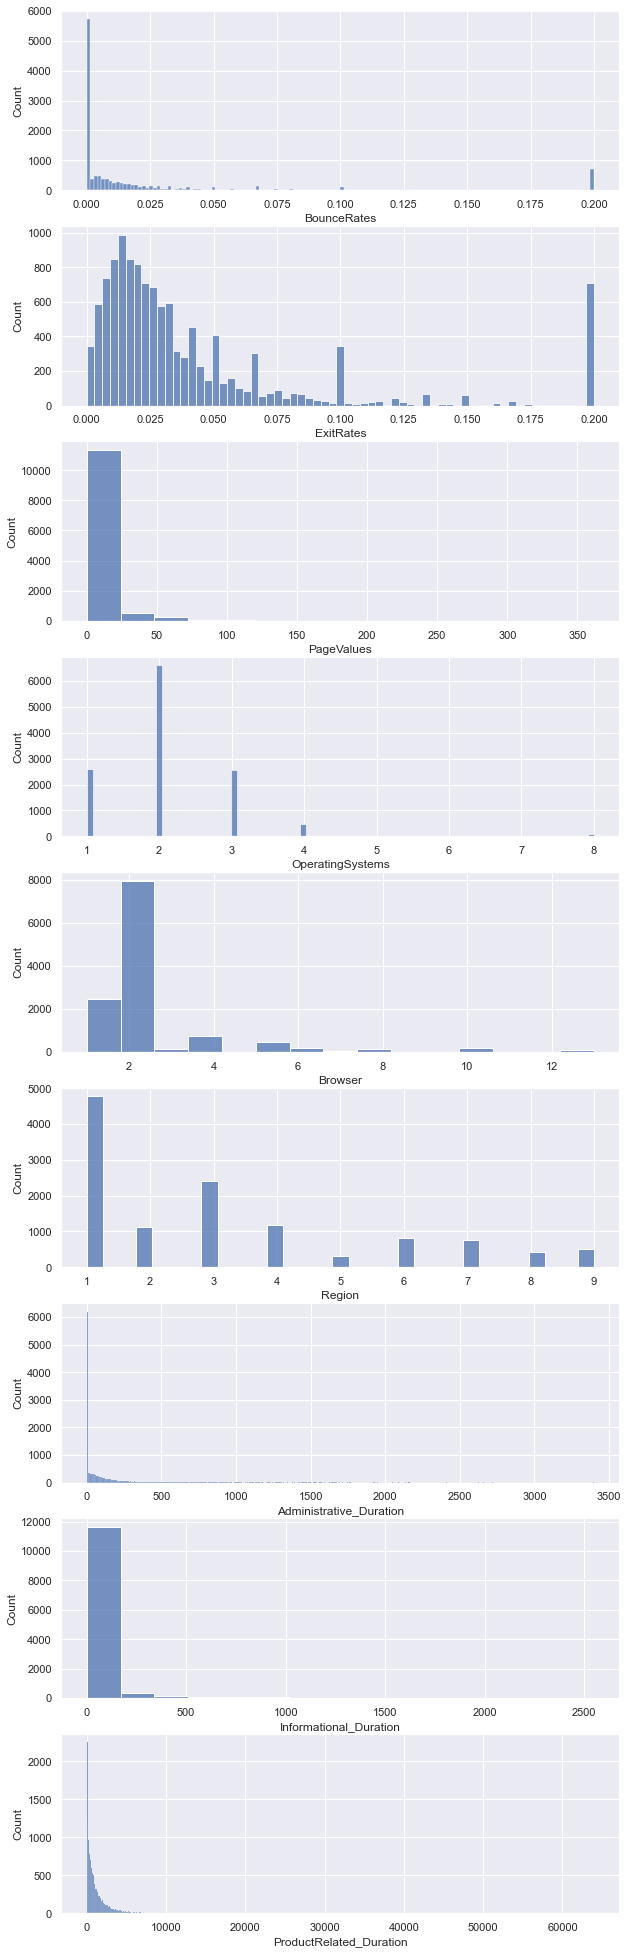

In [ ]:
col_names = ['BounceRates', 'ExitRates','PageValues','OperatingSystems', 'Browser', 'Region', 'Administrative_Duration','Informational_Duration',
              'ProductRelated_Duration'] 
fig, ax = plt.subplots(len(col_names), figsize=(10,35))
for i, col_val in enumerate(col_names):
    sns.histplot(data[col_val], ax=ax[i])
plt.show()

1. There isnt much outliers for all the attributes showing duration of the types of visit
2. The distributions of the features are mostly left skewed which means that we dont have the representative data for higher values.

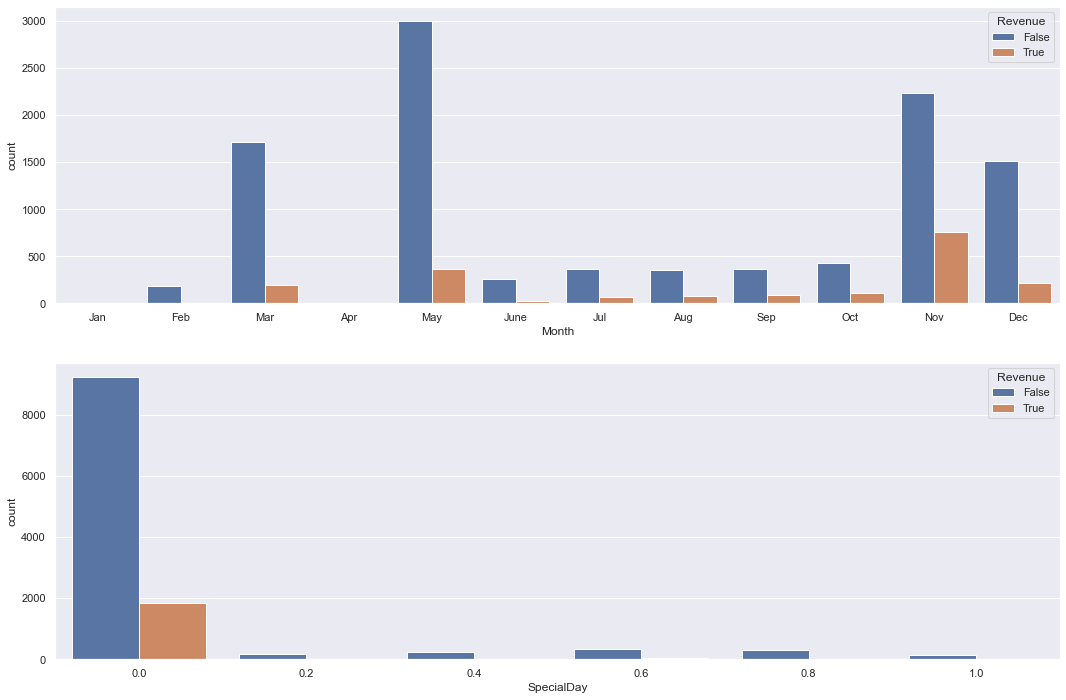

In [ ]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

month_list = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=data, x='Month', hue='Revenue', ax=ax1, order=month_list)
sns.countplot(data=data, x='SpecialDay', hue='Revenue', ax=ax2)

plt.show()



1. January and April has no visitors at all. Maybe keeping some sort of sale during these months might increase visitors and hopefuly the revenue generation 
2. March, May and December has a lot of shoppers with may having the maximum number of visits amongst all the months but a very few of these visitors are contributing to revenue generation.
3. Most revenue generation occur during November.
4. The closer the visit date is to a special day (like valentines day, new year's eve  etc) visitor do not purchase anything but they do on the special day itself.



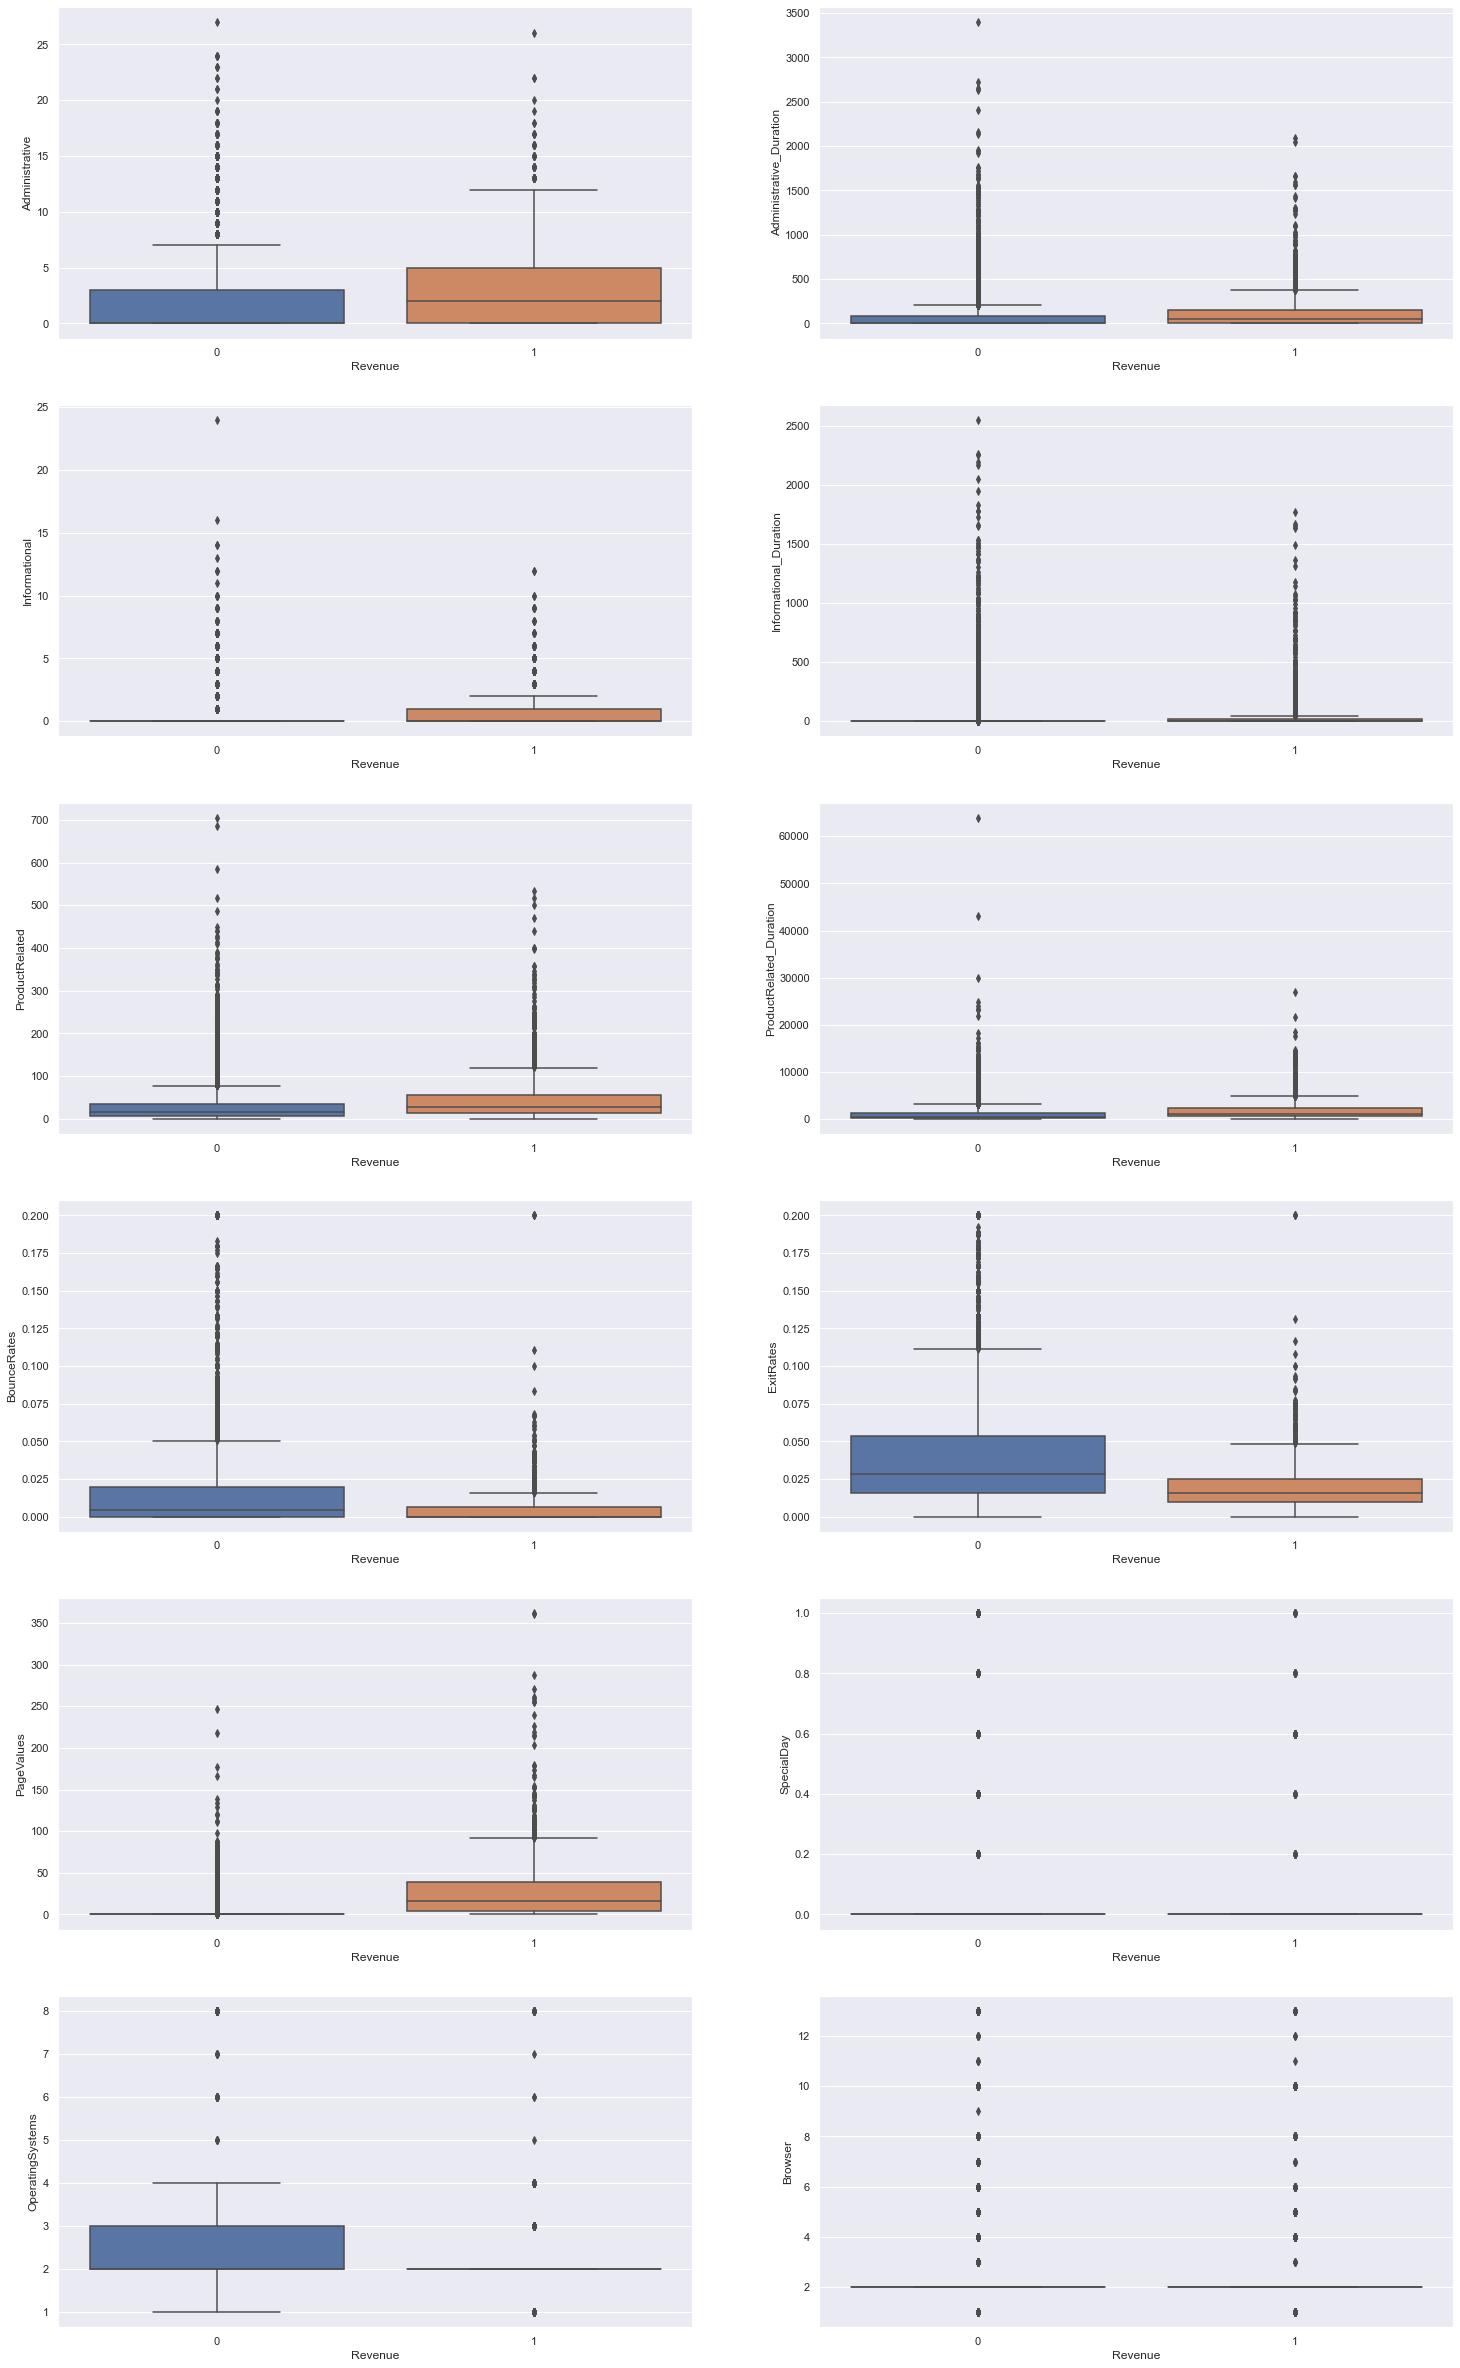

In [ ]:
fig = plt.figure(figsize=(25, 50))
ax=[]
for i in range(12):
  ax.append(fig.add_subplot(7, 2, i+1))

for i in range(12):
  sns.boxplot(data=data, x = 'Revenue', y = data.columns[i], ax=ax[i])

plt.show()

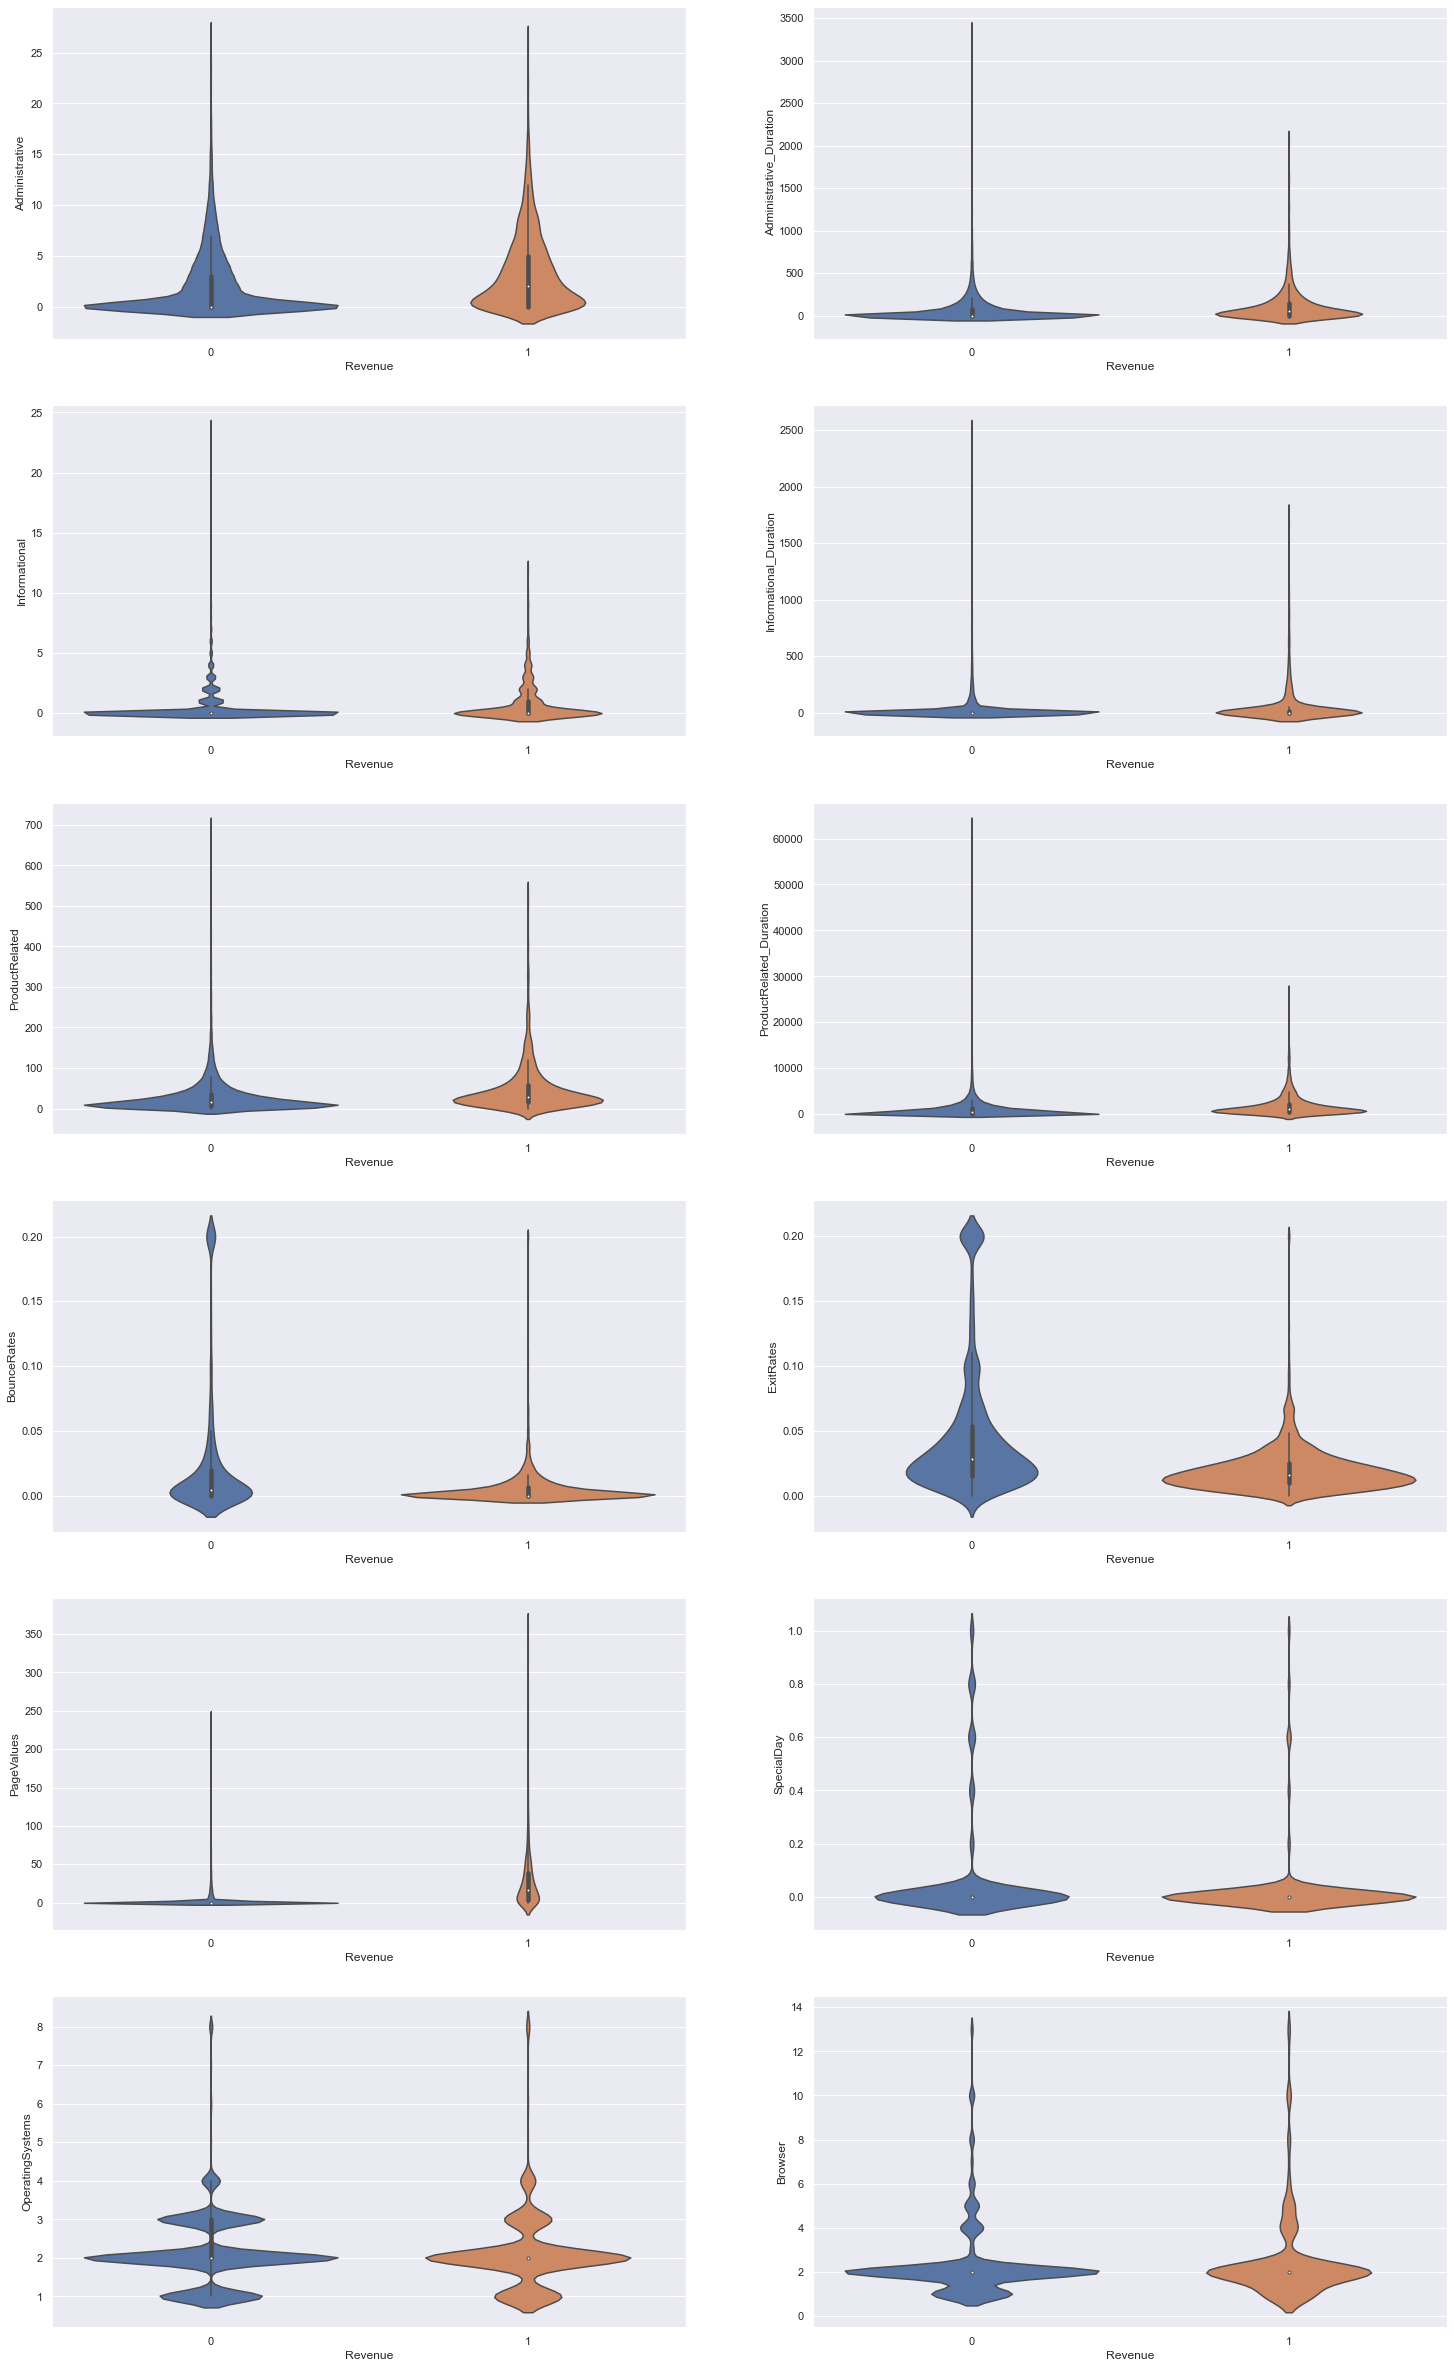

In [ ]:
fig = plt.figure(figsize=(25, 50))
ax=[]
for i in range(12):
  ax.append(fig.add_subplot(7, 2, i+1))

for i in range(12):
  sns.violinplot(data=data, x = 'Revenue', y = data.columns[i], ax=ax[i])

plt.show()

In [ ]:
#one-hot encoding
data = pd.concat([data,pd.get_dummies(data['Month'], prefix='Month')], axis=1)
data = pd.concat([data,pd.get_dummies(data['VisitorType'], prefix='VisitorType')], axis=1)
data = data.drop(['Month'],axis=1)
data = data.drop(['VisitorType'],axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [ ]:
data["Weekend"] = data["Weekend"].astype("uint8")
data["Revenue"] = data["Revenue"].astype("uint8")

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(["Revenue"], axis = 1)
y = data["Revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2055
           1       0.83      0.01      0.02       411

    accuracy                           0.83      2466
   macro avg       0.83      0.51      0.47      2466
weighted avg       0.83      0.83      0.76      2466



In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2055
           1       0.71      0.35      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.85      0.87      0.85      2466



C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2055
           1       0.61      0.27      0.37       411

    accuracy                           0.85      2466
   macro avg       0.74      0.62      0.64      2466
weighted avg       0.82      0.85      0.82      2466



In [ ]:
params={'n_neighbors': range(1, 10)}
gridsearch=GridSearchCV(knn,params)
gridsearch.fit(X_train,y_train)
print(gridsearch.best_params_)
knn = gridsearch.best_estimator_
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have val

{'n_neighbors': 8}


C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2055
           1       0.78      0.19      0.31       411

    accuracy                           0.86      2466
   macro avg       0.82      0.59      0.62      2466
weighted avg       0.85      0.86      0.82      2466



In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.75      0.52      0.61       411

    accuracy                           0.89      2466
   macro avg       0.83      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466



In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
print(classification_report(y_test,mlp_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.89      2055
           1       0.50      0.76      0.60       411

    accuracy                           0.83      2466
   macro avg       0.72      0.81      0.75      2466
weighted avg       0.87      0.83      0.85      2466



In [ ]:
adab = AdaBoostClassifier()
adab.fit(X_train,y_train)
adab_pred = adab.predict(X_test)
print(classification_report(y_test,adab_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2055
           1       0.69      0.54      0.61       411

    accuracy                           0.88      2466
   macro avg       0.80      0.75      0.77      2466
weighted avg       0.88      0.88      0.88      2466



C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


As you can see from the above box and violin plots we do have a few outliers especially for class 1 which already suffers from being a only 20% of the dataset, hence doing some sort of outlier detection would help out improving the model efficiency

In [ ]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [ ]:
from imblearn.over_sampling import SMOTE

print("Before", y_train.shape)
# oversampling the train dataset using SMOTE
smt = SMOTE ()
X_train_sm, y_train_sm = smt.fit_resample (X_train, y_train)
print("After", y_train_sm.shape)

Before (9864,)
After (16734,)


In [ ]:
from imblearn.over_sampling import ADASYN

print("Before", y_train.shape)
# oversampling the train dataset using SMOTE
smt = ADASYN()
X_train_ad, y_train_ad = smt.fit_resample (X_train, y_train)
print("After", y_train_sm.shape)

Before (9864,)
After (16734,)


In [ ]:
from imblearn.combine import SMOTETomek

print("Before", y_train.shape)
# oversampling
smt = SMOTETomek()
X_train_smt, y_train_smt = smt.fit_resample (X_train, y_train)
print("After", y_train_sm.shape)

Before (9864,)
After (16734,)


In [ ]:
from imblearn.combine import SMOTEENN

print("Before", y_train.shape)
# oversampling
smt = SMOTEENN()
X_train_sme, y_train_sme = smt.fit_resample (X_train, y_train)
print("After", y_train_sm.shape)

Before (9864,)
After (16734,)


In [ ]:
model = svc.fit(X_train_sm,y_train_sm)
y_pred = model.predict(X_test)
print("SMOTE:\n",classification_report(y_test,y_pred))
model = svc.fit(X_train_ad,y_train_ad)
y_pred = model.predict(X_test)
print("ADASYN:\n",classification_report(y_test,y_pred))
model = svc.fit(X_train_smt,y_train_smt)
y_pred = model.predict(X_test)
print("SMOTETomek:\n",classification_report(y_test,y_pred))
model = svc.fit(X_train_sme,y_train_sme)
y_pred = model.predict(X_test)
print("SMOTEENN:\n",classification_report(y_test,y_pred))

SMOTE:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82      2055
           1       0.35      0.74      0.48       411

    accuracy                           0.73      2466
   macro avg       0.64      0.73      0.65      2466
weighted avg       0.84      0.73      0.76      2466

ADASYN:
               precision    recall  f1-score   support

           0       0.93      0.68      0.79      2055
           1       0.32      0.75      0.45       411

    accuracy                           0.70      2466
   macro avg       0.63      0.72      0.62      2466
weighted avg       0.83      0.70      0.73      2466

SMOTETomek:
               precision    recall  f1-score   support

           0       0.93      0.74      0.83      2055
           1       0.36      0.73      0.48       411

    accuracy                           0.74      2466
   macro avg       0.65      0.74      0.65      2466
weighted avg       0.84      0.74      0.77 

In [ ]:
model = lr.fit(X_train_sm,y_train_sm)
y_pred = model.predict(X_test)
print("SMOTE:\n",classification_report(y_test,y_pred))
model = lr.fit(X_train_ad,y_train_ad)
y_pred = model.predict(X_test)
print("ADASYN:\n",classification_report(y_test,y_pred))
model = lr.fit(X_train_smt,y_train_smt)
y_pred = model.predict(X_test)
print("SMOTETomek:\n",classification_report(y_test,y_pred))
model = lr.fit(X_train_sme,y_train_sme)
y_pred = model.predict(X_test)
print("SMOTEENN:\n",classification_report(y_test,y_pred))

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SMOTE:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      2055
           1       0.62      0.72      0.67       411

    accuracy                           0.88      2466
   macro avg       0.78      0.82      0.80      2466
weighted avg       0.89      0.88      0.88      2466



C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ADASYN:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      2055
           1       0.60      0.72      0.65       411

    accuracy                           0.87      2466
   macro avg       0.77      0.81      0.79      2466
weighted avg       0.88      0.87      0.88      2466



C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SMOTETomek:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      2055
           1       0.60      0.71      0.65       411

    accuracy                           0.87      2466
   macro avg       0.77      0.81      0.79      2466
weighted avg       0.88      0.87      0.88      2466

SMOTEENN:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      2055
           1       0.56      0.80      0.66       411

    accuracy                           0.86      2466
   macro avg       0.76      0.84      0.79      2466
weighted avg       0.89      0.86      0.87      2466



C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model = knn.fit(X_train_sm,y_train_sm)
y_pred = model.predict(X_test)
print("SMOTE:\n",classification_report(y_test,y_pred))
model = knn.fit(X_train_ad,y_train_ad)
y_pred = model.predict(X_test)
print("ADASYN:\n",classification_report(y_test,y_pred))
model = knn.fit(X_train_smt,y_train_smt)
y_pred = model.predict(X_test)
print("SMOTETomek:\n",classification_report(y_test,y_pred))
model = knn.fit(X_train_sme,y_train_sme)
y_pred = model.predict(X_test)
print("SMOTEENN:\n",classification_report(y_test,y_pred))

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


SMOTE:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      2055
           1       0.40      0.58      0.47       411

    accuracy                           0.78      2466
   macro avg       0.65      0.70      0.67      2466
weighted avg       0.82      0.78      0.80      2466



C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ADASYN:
               precision    recall  f1-score   support

           0       0.91      0.79      0.84      2055
           1       0.37      0.61      0.46       411

    accuracy                           0.76      2466
   macro avg       0.64      0.70      0.65      2466
weighted avg       0.82      0.76      0.78      2466



C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


SMOTETomek:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      2055
           1       0.39      0.55      0.46       411

    accuracy                           0.78      2466
   macro avg       0.65      0.69      0.66      2466
weighted avg       0.82      0.78      0.80      2466



C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


SMOTEENN:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      2055
           1       0.35      0.69      0.46       411

    accuracy                           0.73      2466
   macro avg       0.63      0.71      0.64      2466
weighted avg       0.83      0.73      0.76      2466



In [ ]:
model = rf.fit(X_train_sm,y_train_sm)
y_pred = model.predict(X_test)
print("SMOTE:\n",classification_report(y_test,y_pred))
model = rf.fit(X_train_ad,y_train_ad)
y_pred = model.predict(X_test)
print("ADASYN:\n",classification_report(y_test,y_pred))
model = rf.fit(X_train_smt,y_train_smt)
y_pred = model.predict(X_test)
print("SMOTETomek:\n",classification_report(y_test,y_pred))
model = rf.fit(X_train_sme,y_train_sme)
y_pred = model.predict(X_test)
print("SMOTEENN:\n",classification_report(y_test,y_pred))

SMOTE:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2055
           1       0.69      0.67      0.68       411

    accuracy                           0.89      2466
   macro avg       0.81      0.81      0.81      2466
weighted avg       0.89      0.89      0.89      2466

ADASYN:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      2055
           1       0.68      0.66      0.67       411

    accuracy                           0.89      2466
   macro avg       0.81      0.80      0.80      2466
weighted avg       0.89      0.89      0.89      2466

SMOTETomek:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      2055
           1       0.70      0.66      0.68       411

    accuracy                           0.90      2466
   macro avg       0.81      0.80      0.81      2466
weighted avg       0.89      0.90      0.89 

In [ ]:
model = mlp.fit(X_train_sm,y_train_sm)
y_pred = model.predict(X_test)
print("SMOTE:\n",classification_report(y_test,y_pred))
model = mlp.fit(X_train_ad,y_train_ad)
y_pred = model.predict(X_test)
print("ADASYN:\n",classification_report(y_test,y_pred))
model = mlp.fit(X_train_smt,y_train_smt)
y_pred = model.predict(X_test)
print("SMOTETomek:\n",classification_report(y_test,y_pred))
model = mlp.fit(X_train_sme,y_train_sme)
y_pred = model.predict(X_test)
print("SMOTEENN:\n",classification_report(y_test,y_pred))

SMOTE:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2055
           1       0.66      0.60      0.63       411

    accuracy                           0.88      2466
   macro avg       0.79      0.77      0.78      2466
weighted avg       0.88      0.88      0.88      2466

ADASYN:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      2055
           1       0.76      0.32      0.45       411

    accuracy                           0.87      2466
   macro avg       0.82      0.65      0.69      2466
weighted avg       0.86      0.87      0.85      2466

SMOTETomek:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86      2055
           1       0.42      0.78      0.54       411

    accuracy                           0.78      2466
   macro avg       0.68      0.78      0.70      2466
weighted avg       0.86      0.78      0.80 

In [ ]:
model = adab.fit(X_train_sm,y_train_sm)
y_pred = model.predict(X_test)
print("SMOTE:\n",classification_report(y_test,y_pred))
model = adab.fit(X_train_ad,y_train_ad)
y_pred = model.predict(X_test)
print("ADASYN:\n",classification_report(y_test,y_pred))
model = adab.fit(X_train_smt,y_train_smt)
y_pred = model.predict(X_test)
print("SMOTETomek:\n",classification_report(y_test,y_pred))
model = adab.fit(X_train_sme,y_train_sme)
y_pred = model.predict(X_test)
print("SMOTEENN:\n",classification_report(y_test,y_pred))

C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


SMOTE:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      2055
           1       0.62      0.65      0.64       411

    accuracy                           0.88      2466
   macro avg       0.78      0.79      0.78      2466
weighted avg       0.88      0.88      0.88      2466



C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


ADASYN:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      2055
           1       0.62      0.67      0.64       411

    accuracy                           0.88      2466
   macro avg       0.78      0.79      0.79      2466
weighted avg       0.88      0.88      0.88      2466



C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


SMOTETomek:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2055
           1       0.64      0.65      0.64       411

    accuracy                           0.88      2466
   macro avg       0.78      0.79      0.79      2466
weighted avg       0.88      0.88      0.88      2466

SMOTEENN:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      2055
           1       0.59      0.76      0.67       411

    accuracy                           0.87      2466
   macro avg       0.77      0.83      0.79      2466
weighted avg       0.89      0.87      0.88      2466



C:\Users\Ayush_AE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
